In [1]:
#Multiple Linear Regression
#Import all the required Libraries
import pandas as pd #data manipulation and analysis.
import numpy as np #numerical computing.
import matplotlib.pyplot as plt #Used for Visualization
import seaborn as sns #Used for Visualization
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the data
import pandas as pd
df = pd.read_csv('apartments_for_rent_classified_100K.csv', encoding_errors='ignore',on_bad_lines='skip', sep=';')

In [3]:
df.head(10)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
5,5668639368,housing/rent/apartment,Two BR 7801 Marble NE,"This unit is located at 7801 Marble NE, Albuqu...",NaN,1.5,2.0,USD,No,Thumbnail,...,"$1,250",Monthly,965,7801 Marble NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
6,5668638765,housing/rent/apartment,Two BR 5 Salt Marsh Quay Apartment H,This unit is located at five Salt Marsh Quay A...,NaN,2.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,1120,5 Salt Marsh Quay Apartment H,Hampton,VA,37.0451,-76.3664,RentLingo,1577360261
7,5668638578,housing/rent/apartment,Two BR 11280 W. 20th Ave.,"This unit is located at 11280 W. 20th Ave., La...",NaN,2.0,2.0,USD,No,Thumbnail,...,"$1,300",Monthly,947,11280 W 20th Avenue,Lakewood,CO,39.6894,-105.1119,RentLingo,1577360247
8,5668638476,housing/rent/apartment,Two BR 1427 Lewis Street,"This unit is located at 1427 Lewis Street, Cha...",NaN,1.0,2.0,USD,No,Thumbnail,...,$795,Monthly,600,1427 Lewis St,Charleston,WV,38.3454,-81.6219,RentLingo,1577360239
9,5668638122,housing/rent/apartment,Two BR 10201 Remmet Avenue,"This unit is located at 10201 Remmet Avenue, C...",NaN,2.0,2.0,USD,No,Thumbnail,...,"$2,150",Monthly,1005,10201 Remmet Ave,Chatsworth,CA,34.2551,-118.5976,RentLingo,1577360204


In [4]:
df.tail(10)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99482,5121222010,housing/rent/apartment,Apartment for rent in Eugene.,"Square footage: 716 square feet A/c, Dishwashe...","AC,Dishwasher,Refrigerator,Storage",1.0,2.0,USD,No,Yes,...,"$1,450",Monthly,716,NaN,Eugene,OR,43.9495,-123.1280,RentDigs.com,1544185913
99483,5121221636,housing/rent/apartment,RARELY AVAILABLE. Do not miss out on this drea...,RARELY Do not miss out on this dream apartment...,"Dishwasher,Doorman,Patio/Deck,Refrigerator,Sto...",1.0,1.0,USD,No,Yes,...,"$3,200",Monthly,700,NaN,New York,NY,40.7752,-73.9830,RentDigs.com,1544185892
99484,5121221590,housing/rent/apartment,Apartment for rent in Eugene.,"A/c, Dishwasher, Storage, Refrigerator, Microw...","AC,Dishwasher,Refrigerator,Storage",1.0,2.0,USD,No,Yes,...,"$1,035",Monthly,505,NaN,Eugene,OR,43.9495,-123.1280,RentDigs.com,1544185889
99485,5121221353,housing/rent/apartment,"Attractive One BR, One BA. Single Car Garage!",Tower 67 is an impressive 49 level full servic...,"Dishwasher,Gym,Parking",1.0,1.0,USD,No,Yes,...,"$4,395",Monthly,1095,NaN,New York,NY,40.7752,-73.9830,RentDigs.com,1544185873
99486,5121221006,housing/rent/apartment,"Great Central Location One BR, One BA",nd Park is an upscale apartment community Jack...,"Gym,Patio/Deck,Pool,Washer Dryer",1.0,1.0,USD,No,Yes,...,$798,Monthly,650,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185844
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670
99491,5121218844,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,...,"$1,595",Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185659


In [5]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [6]:
df.shape

(99492, 22)

In [7]:
df.shape

(99492, 22)

In [8]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [9]:
df.nunique()

id               99408
category             7
title            58503
body             94503
amenities         9827
bathrooms           16
bedrooms            10
currency             1
fee                  2
has_photo            3
pets_allowed         4
price             3687
price_display     3718
price_type           3
square_feet       2538
address           7771
cityname          2979
state               51
latitude          7212
longitude         7270
source              25
time             75360
dtype: int64

In [10]:
df.nunique().sum()

np.int64(372898)

In [11]:
df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [12]:
df.duplicated().sum()

np.int64(84)

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99487    False
99488    False
99489    False
99490    False
99491    False
Length: 99492, dtype: bool

In [14]:
#Drop the duplicates
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['amenities'] = df['amenities'].fillna(df['amenities'].mode()[0])

<Axes: >

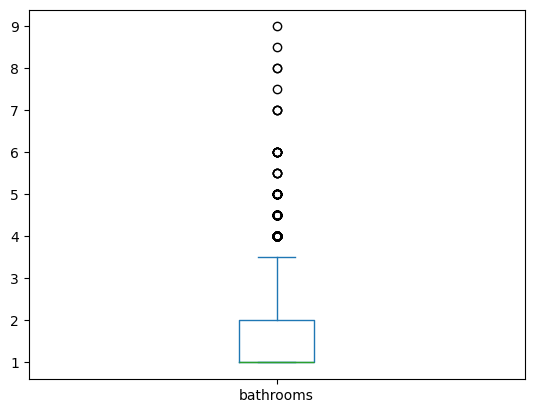

In [17]:
df['bathrooms'].plot(kind='box')

<Axes: >

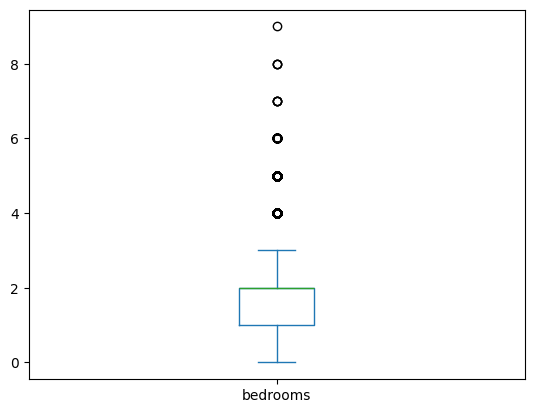

In [18]:
df['bedrooms'].plot(kind='box')

<Axes: >

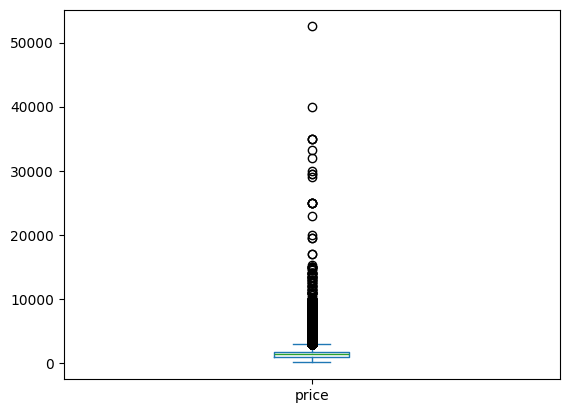

In [19]:
df['price'].plot(kind='box')

<Axes: >

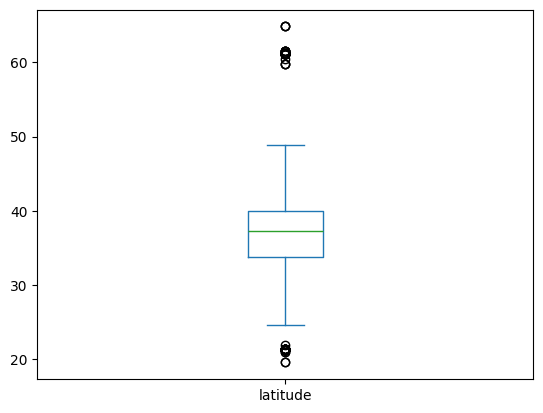

In [20]:
df['latitude'].plot(kind='box')

<Axes: >

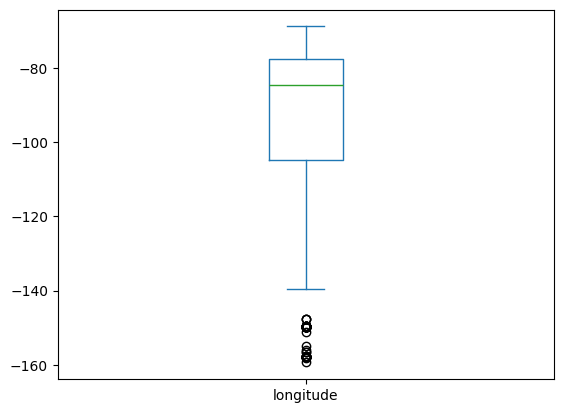

In [21]:
df['longitude'].plot(kind='box')

In [22]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [23]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [24]:
df['pets_allowed'] = df['pets_allowed'].fillna(df['pets_allowed'].mode()[0])

In [25]:
df['price'] = df['price'].fillna(df['price'].median())

In [26]:
df['cityname'] = df['cityname'].fillna(df['cityname'].mode()[0])

In [27]:
df['state'] = df['state'].fillna(df['state'].mode()[0])

In [28]:
df['latitude'] = df['latitude'].fillna(df['latitude'].median())

In [29]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

In [30]:
df.drop(labels = ['price_display','address',],axis = 1, inplace = True)

In [31]:
df.drop(labels = ['id',],axis = 1, inplace = True)

In [32]:
df.drop(labels = ['time','title','body' ],axis = 1, inplace = True)

In [33]:
df.drop(labels = ['amenities','cityname' ],axis = 1, inplace = True)

In [34]:
df.nunique()

category           7
bathrooms         16
bedrooms          10
currency           1
fee                2
has_photo          3
pets_allowed       4
price           3687
price_type         3
square_feet     2538
state             51
latitude        7212
longitude       7270
source            25
dtype: int64

In [35]:
df.columns

Index(['category', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo',
       'pets_allowed', 'price', 'price_type', 'square_feet', 'state',
       'latitude', 'longitude', 'source'],
      dtype='object')

In [36]:
df.dtypes

category         object
bathrooms       float64
bedrooms        float64
currency         object
fee              object
has_photo        object
pets_allowed     object
price           float64
price_type       object
square_feet       int64
state            object
latitude        float64
longitude       float64
source           object
dtype: object

In [37]:
df['category'].nunique()

7

In [38]:
df.columns

Index(['category', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo',
       'pets_allowed', 'price', 'price_type', 'square_feet', 'state',
       'latitude', 'longitude', 'source'],
      dtype='object')

In [39]:
#Exploratory Data Analysis
Categorical = ['category',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price_type','state','source']
Numerical = ['bathrooms', 'bedrooms',
        'price', 'square_feet']

The unique values from category are ['housing/rent/apartment' 'housing/rent/home' 'housing/rent/short_term'
 'housing/rent' 'housing/rent/condo' 'housing/rent/other'
 'housing/rent/commercial/retail']
category
housing/rent/apartment            99347
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/short_term               4
housing/rent/home                     4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64


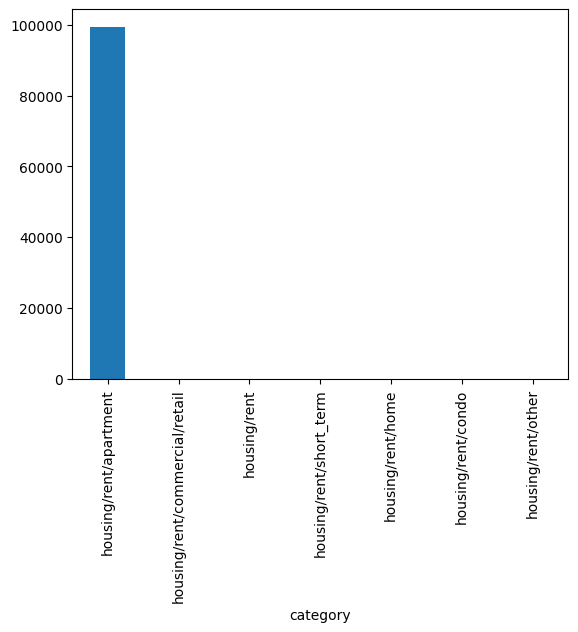

The unique values from currency are ['USD']
currency
USD    99408
Name: count, dtype: int64


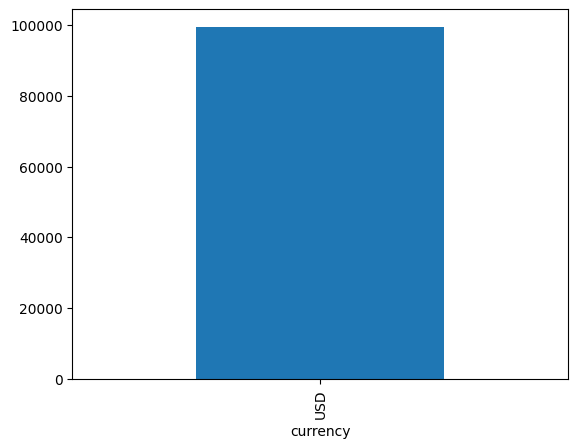

The unique values from fee are ['No' 'Yes']
fee
No     99207
Yes      201
Name: count, dtype: int64


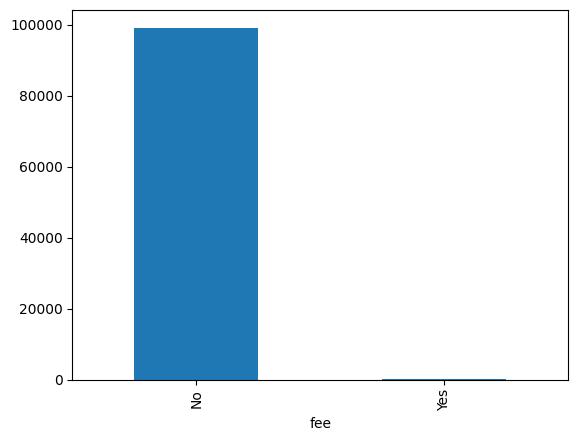

The unique values from has_photo are ['Thumbnail' 'No' 'Yes']
has_photo
Yes          55908
Thumbnail    34302
No            9198
Name: count, dtype: int64


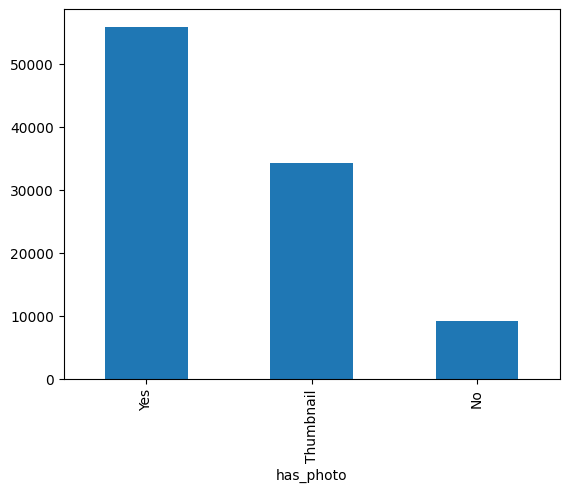

The unique values from pets_allowed are ['Cats' 'Cats,Dogs' 'Dogs' 'Cats,Dogs,None']
pets_allowed
Cats,Dogs         97440
Cats               1840
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64


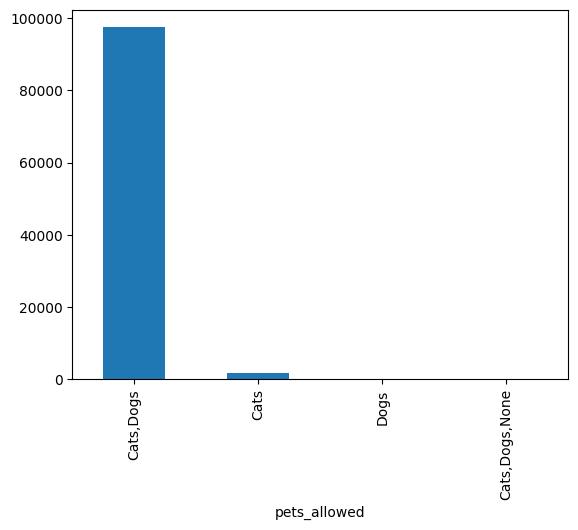

The unique values from price_type are ['Monthly' 'Weekly' 'Monthly|Weekly']
price_type
Monthly           99404
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64


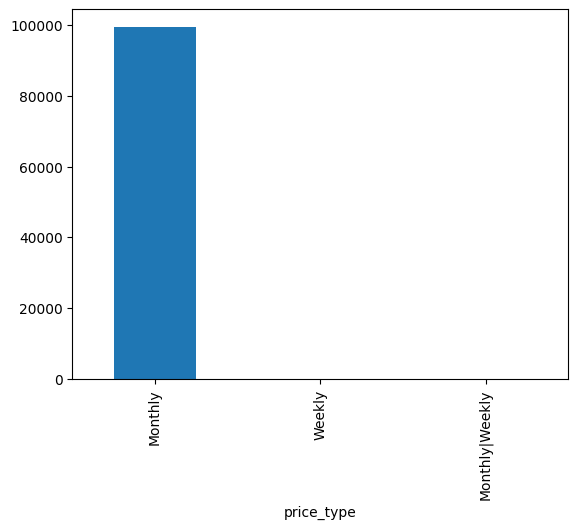

The unique values from state are ['CA' 'VA' 'NC' 'NM' 'CO' 'WV' 'GA' 'MA' 'DC' 'AZ' 'IA' 'WA' 'TX' 'IL'
 'MS' 'OR' 'FL' 'MO' 'PA' 'WI' 'OK' 'UT' 'RI' 'NJ' 'IN' 'MD' 'OH' 'TN'
 'ND' 'NE' 'AR' 'MI' 'MN' 'HI' 'ID' 'SC' 'KS' 'AL' 'SD' 'NY' 'KY' 'LA'
 'AK' 'CT' 'NV' 'WY' 'VT' 'NH' 'MT' 'DE' 'ME']
state
TX    11552
CA    10301
VA     8278
NC     6293
CO     6279
FL     5773
MD     5276
MA     5023
OH     4899
GA     4750
NJ     4444
NV     2813
WA     2595
AZ     2376
LA     1345
MO     1203
PA     1122
TN     1114
IL     1036
NE     1020
KY      995
OK      934
SC      908
KS      899
UT      809
ND      743
NH      735
MI      710
NY      659
AR      598
MN      581
IN      509
CT      509
WI      430
IA      372
AL      354
OR      277
VT      125
RI      119
MS      107
ID       96
DC       93
MT       87
SD       86
AK       58
ME       32
HI       31
NM       24
WY       16
WV       13
DE        7
Name: count, dtype: int64


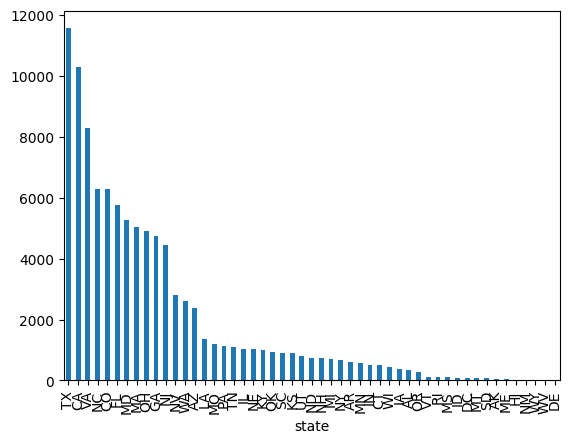

The unique values from source are ['RentLingo' 'ListedBuy' 'RentDigs.com' 'RENTCaf' 'GoSection8' 'Listanza'
 'RealRentals' 'RENTOCULAR' 'tenantcloud' 'Real Estate Agent' 'rentbits'
 'Home Rentals' 'Nest Seekers' 'RentFeeder' 'vFlyer' 'Claz'
 'Real Estate Shows' 'Seattle Rentals' 'BostonApartments' 'SpreadMyAd'
 'Apartable' 'Z57' 'FreeAdsTime' 'AgentWebsite' 'HousesForRent']
source
RentDigs.com         90828
RentLingo             6924
ListedBuy              571
GoSection8             437
RealRentals            268
tenantcloud            124
BostonApartments        94
RENTCaf                 41
Listanza                29
SpreadMyAd              22
RENTOCULAR              18
RentFeeder              12
Home Rentals             8
Claz                     8
Nest Seekers             5
vFlyer                   5
rentbits                 5
Seattle Rentals          2
Real Estate Agent        1
Real Estate Shows        1
Apartable                1
Z57                      1
FreeAdsTime           

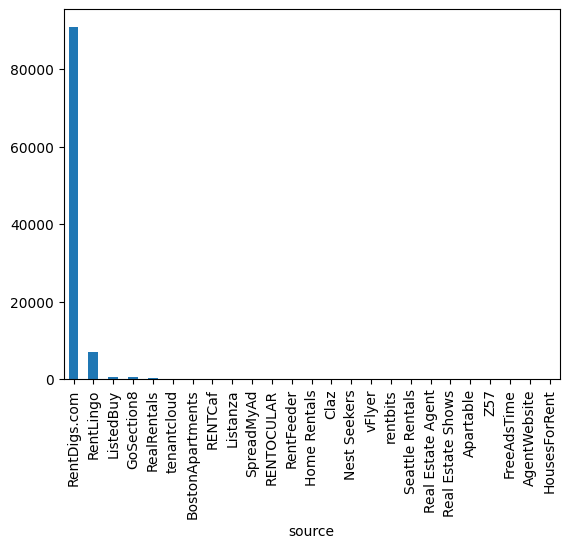

In [40]:
#Univariate Analysis
import matplotlib.pyplot as plt

for i in Categorical:
    print(f'The unique values from {i} are {df[i].unique()}')
    print(df[i].value_counts())
    df[i].value_counts().plot(kind='bar')
    plt.show()

The kde values from bathrooms


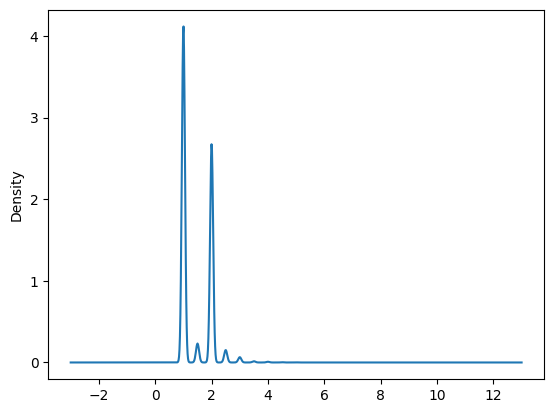

The kde values from bedrooms


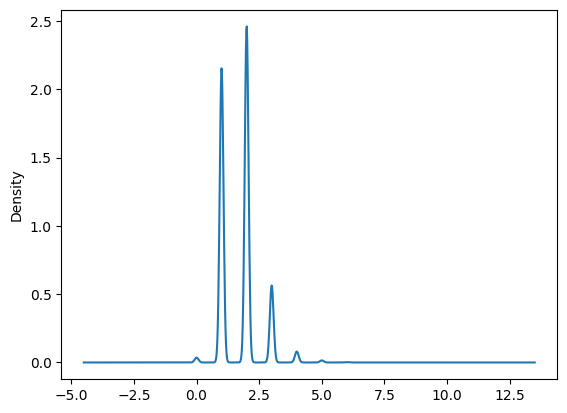

The kde values from price


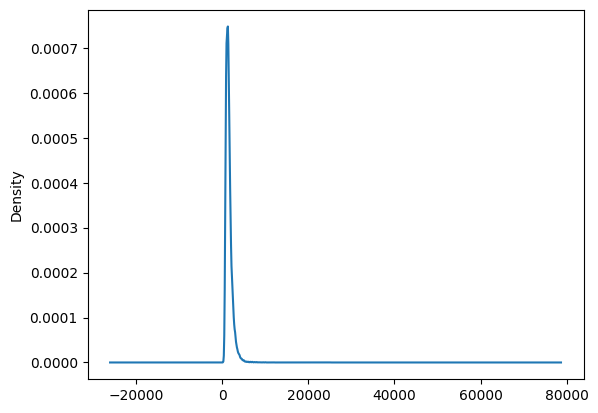

The kde values from square_feet


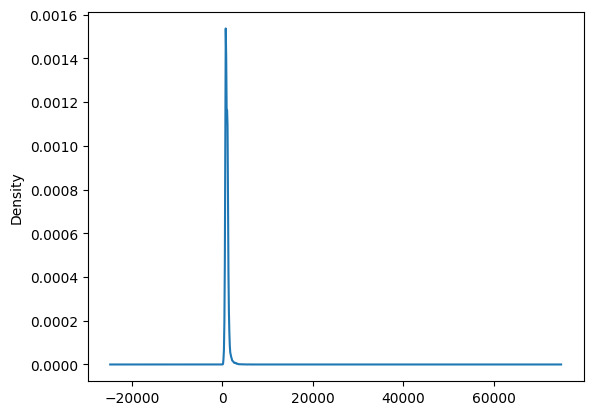

In [41]:
import matplotlib.pyplot as plt

for i in Numerical:
    print(f'The kde values from {i}')
    df[i].plot(kind='kde')
    plt.show()

The average bathrooms for each category in category is category
housing/rent                      1.857143
housing/rent/apartment            1.444991
housing/rent/commercial/retail    1.428571
housing/rent/condo                1.666667
housing/rent/home                 1.250000
housing/rent/other                1.000000
housing/rent/short_term           1.375000
Name: bathrooms, dtype: float64.


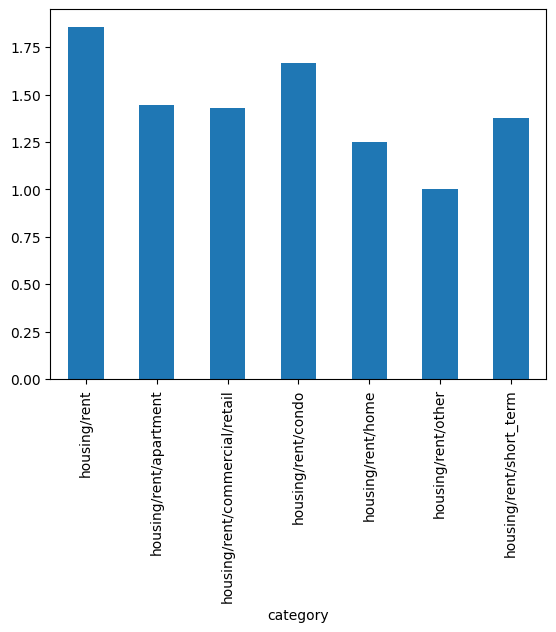

The min bathrooms for each category in category is category
housing/rent                      1.0
housing/rent/apartment            1.0
housing/rent/commercial/retail    1.0
housing/rent/condo                1.0
housing/rent/home                 1.0
housing/rent/other                1.0
housing/rent/short_term           1.0
Name: bathrooms, dtype: float64.


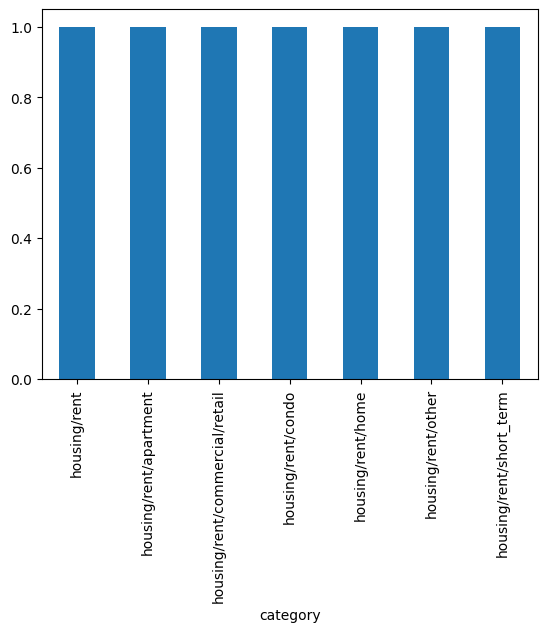

The max bathrooms for each category in category is category
housing/rent                      3.0
housing/rent/apartment            9.0
housing/rent/commercial/retail    2.0
housing/rent/condo                2.0
housing/rent/home                 2.0
housing/rent/other                1.0
housing/rent/short_term           2.0
Name: bathrooms, dtype: float64.


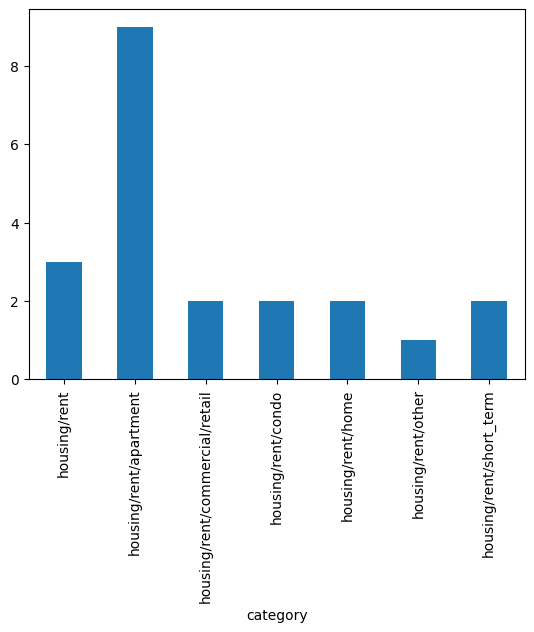

The average bedrooms for each category in category is category
housing/rent                      2.857143
housing/rent/apartment            1.728507
housing/rent/commercial/retail    1.500000
housing/rent/condo                1.666667
housing/rent/home                 2.000000
housing/rent/other                3.000000
housing/rent/short_term           1.500000
Name: bedrooms, dtype: float64.


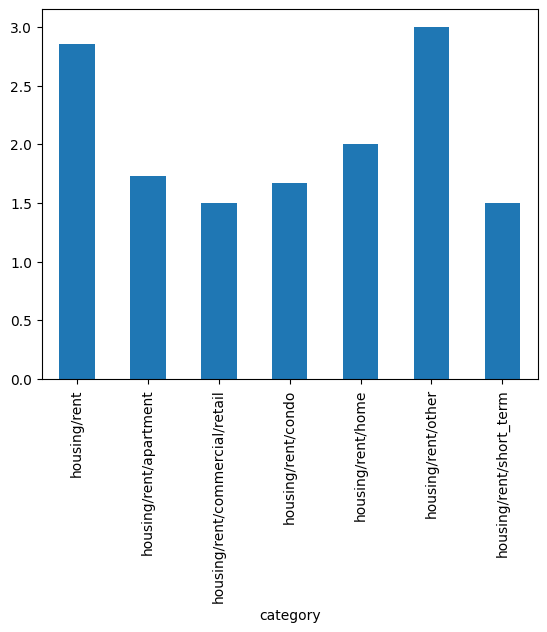

The min bedrooms for each category in category is category
housing/rent                      1.0
housing/rent/apartment            0.0
housing/rent/commercial/retail    1.0
housing/rent/condo                0.0
housing/rent/home                 1.0
housing/rent/other                3.0
housing/rent/short_term           1.0
Name: bedrooms, dtype: float64.


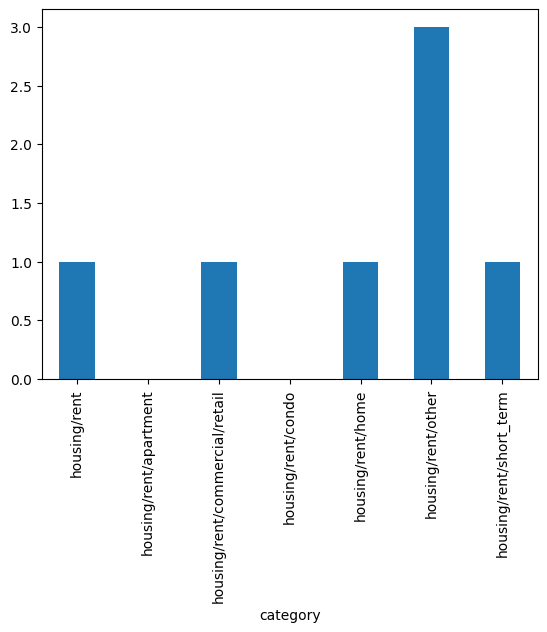

The max bedrooms for each category in category is category
housing/rent                      5.0
housing/rent/apartment            9.0
housing/rent/commercial/retail    2.0
housing/rent/condo                3.0
housing/rent/home                 3.0
housing/rent/other                3.0
housing/rent/short_term           2.0
Name: bedrooms, dtype: float64.


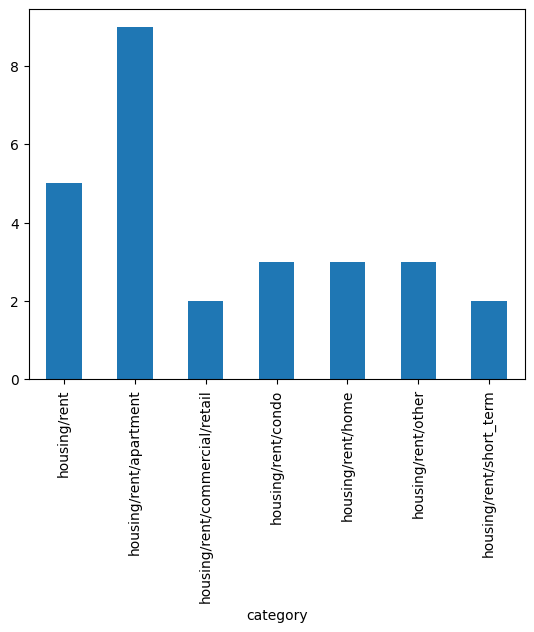

The average price for each category in category is category
housing/rent                      2005.000000
housing/rent/apartment            1526.965303
housing/rent/commercial/retail    1770.357143
housing/rent/condo                1985.000000
housing/rent/home                 1137.500000
housing/rent/other                1275.000000
housing/rent/short_term            960.500000
Name: price, dtype: float64.


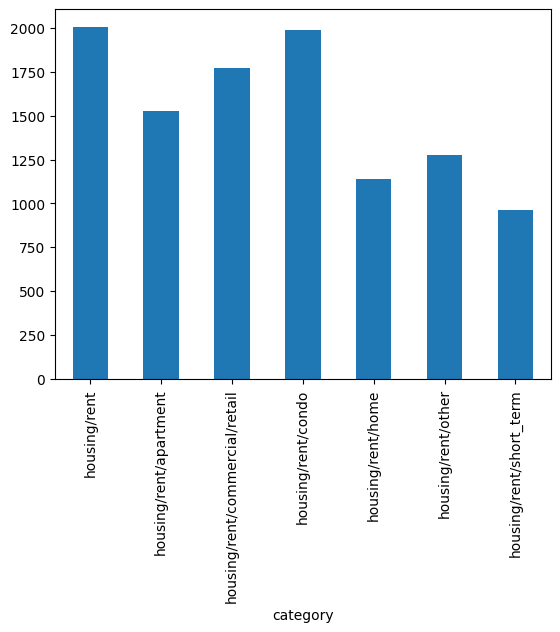

The min price for each category in category is category
housing/rent                       800.0
housing/rent/apartment             100.0
housing/rent/commercial/retail    1320.0
housing/rent/condo                 650.0
housing/rent/home                  475.0
housing/rent/other                1275.0
housing/rent/short_term            500.0
Name: price, dtype: float64.


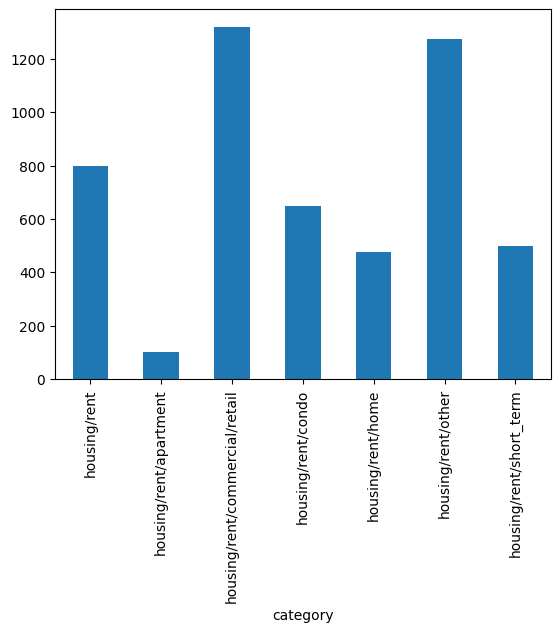

The max price for each category in category is category
housing/rent                       3700.0
housing/rent/apartment            52500.0
housing/rent/commercial/retail     2165.0
housing/rent/condo                 3380.0
housing/rent/home                  2000.0
housing/rent/other                 1275.0
housing/rent/short_term            1489.0
Name: price, dtype: float64.


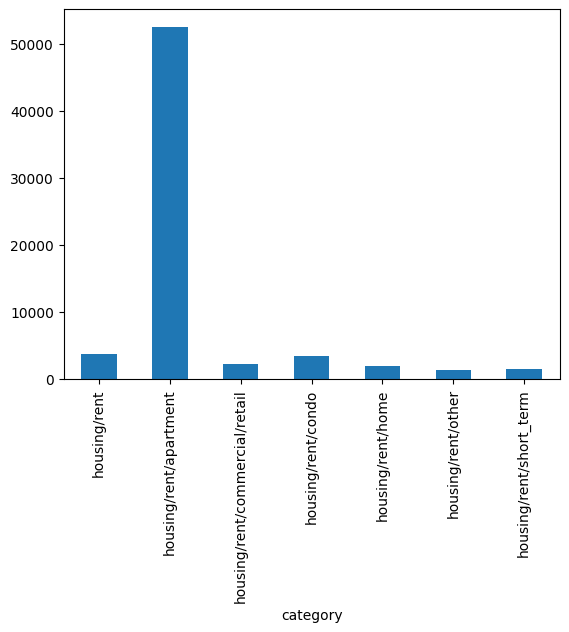

The average square_feet for each category in category is category
housing/rent                      1842.857143
housing/rent/apartment             956.381773
housing/rent/commercial/retail     977.714286
housing/rent/condo                 837.333333
housing/rent/home                  846.000000
housing/rent/other                1100.000000
housing/rent/short_term            842.750000
Name: square_feet, dtype: float64.


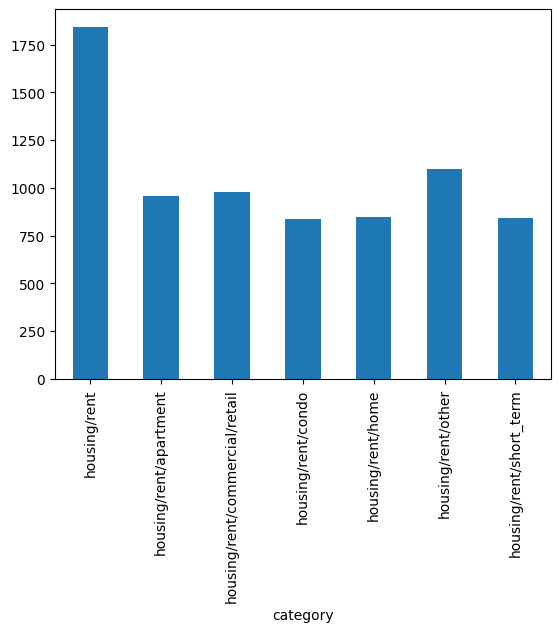

The min square_feet for each category in category is category
housing/rent                       700
housing/rent/apartment             101
housing/rent/commercial/retail     576
housing/rent/condo                 436
housing/rent/home                  664
housing/rent/other                1100
housing/rent/short_term            783
Name: square_feet, dtype: int64.


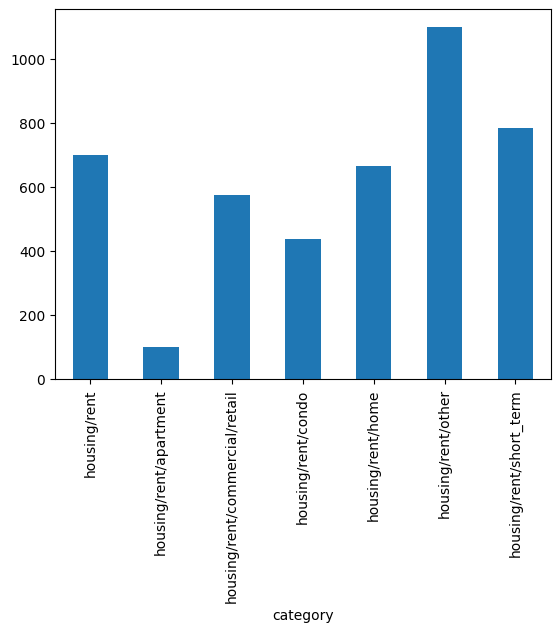

The max square_feet for each category in category is category
housing/rent                       2914
housing/rent/apartment            50000
housing/rent/commercial/retail     1237
housing/rent/condo                 1061
housing/rent/home                   950
housing/rent/other                 1100
housing/rent/short_term             900
Name: square_feet, dtype: int64.


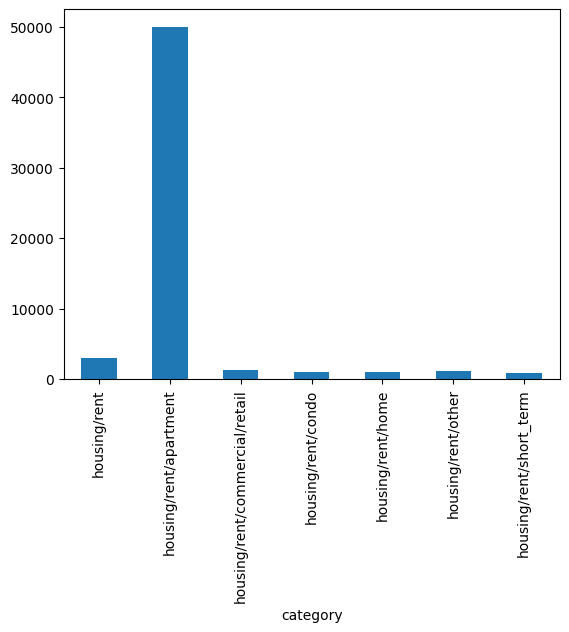

The average bathrooms for each category in currency is currency
USD    1.445004
Name: bathrooms, dtype: float64.


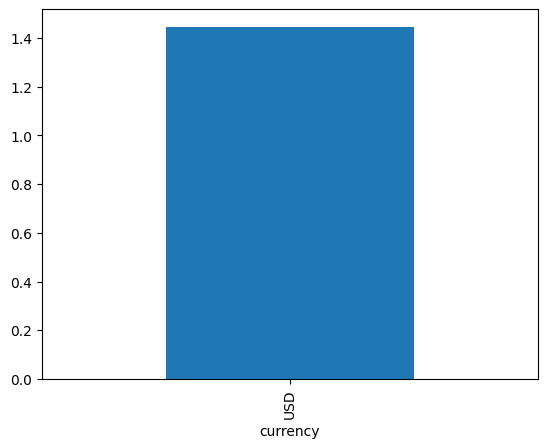

The min bathrooms for each category in currency is currency
USD    1.0
Name: bathrooms, dtype: float64.


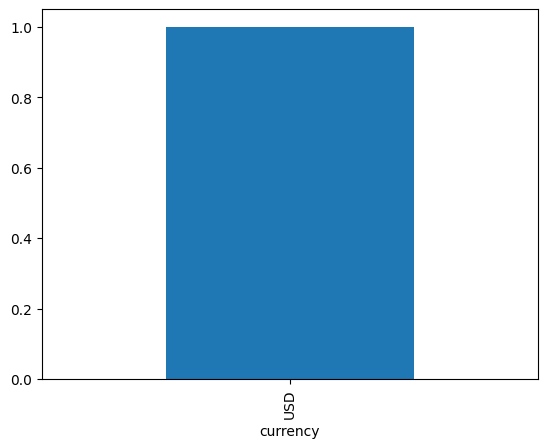

The max bathrooms for each category in currency is currency
USD    9.0
Name: bathrooms, dtype: float64.


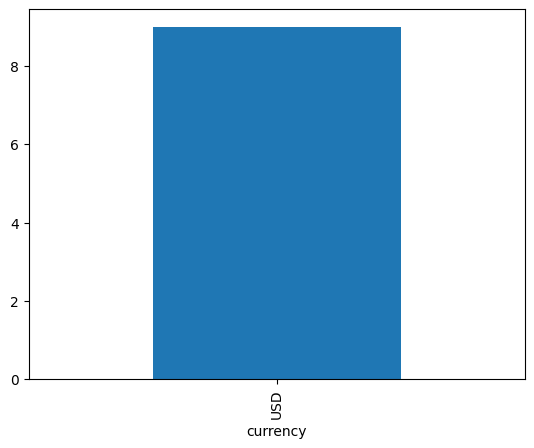

The average bedrooms for each category in currency is currency
USD    1.728503
Name: bedrooms, dtype: float64.


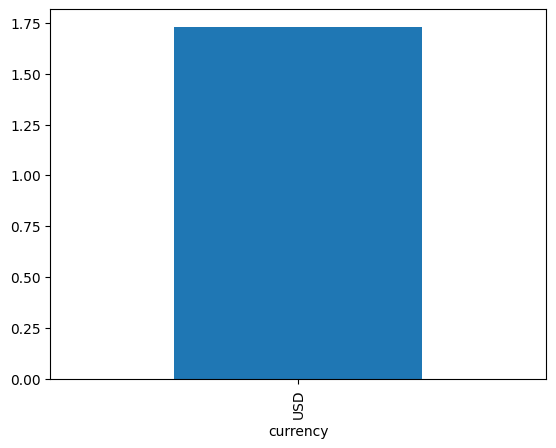

The min bedrooms for each category in currency is currency
USD    0.0
Name: bedrooms, dtype: float64.


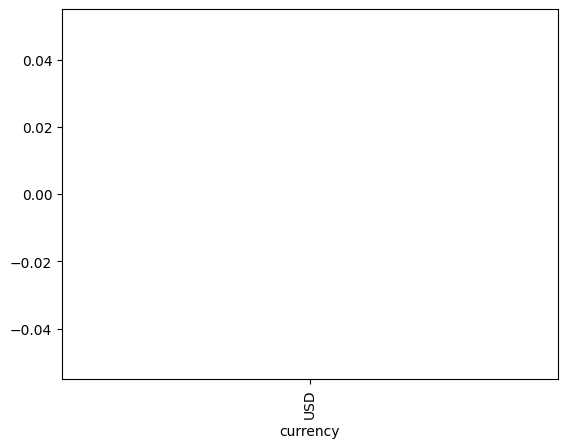

The max bedrooms for each category in currency is currency
USD    9.0
Name: bedrooms, dtype: float64.


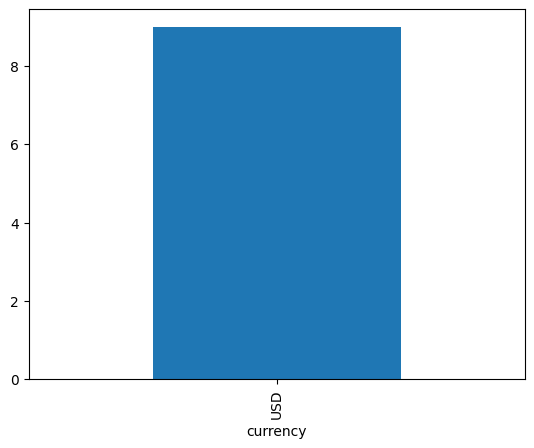

The average price for each category in currency is currency
USD    1527.074622
Name: price, dtype: float64.


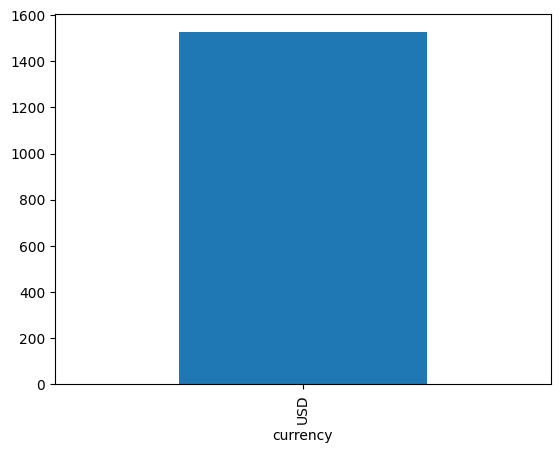

The min price for each category in currency is currency
USD    100.0
Name: price, dtype: float64.


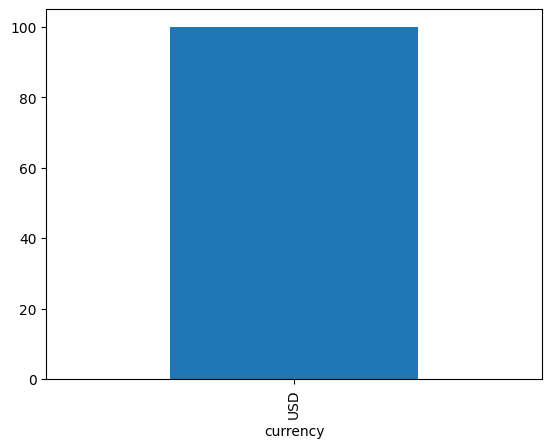

The max price for each category in currency is currency
USD    52500.0
Name: price, dtype: float64.


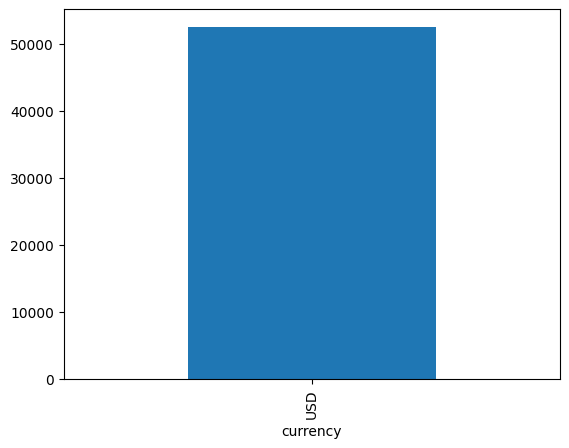

The average square_feet for each category in currency is currency
USD    956.442047
Name: square_feet, dtype: float64.


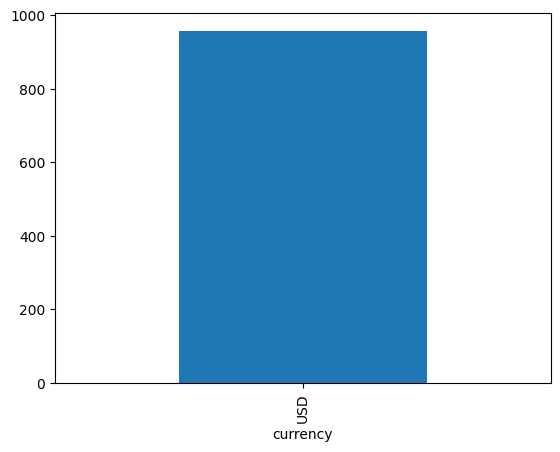

The min square_feet for each category in currency is currency
USD    101
Name: square_feet, dtype: int64.


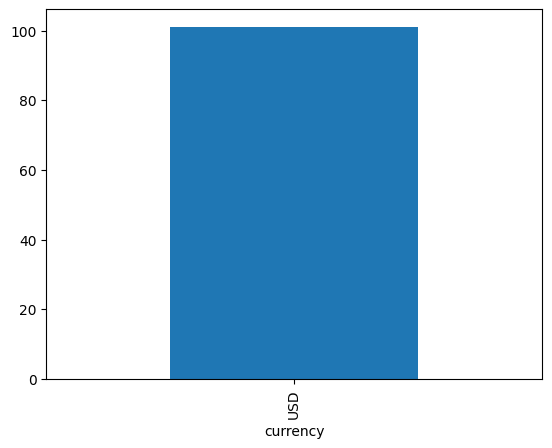

The max square_feet for each category in currency is currency
USD    50000
Name: square_feet, dtype: int64.


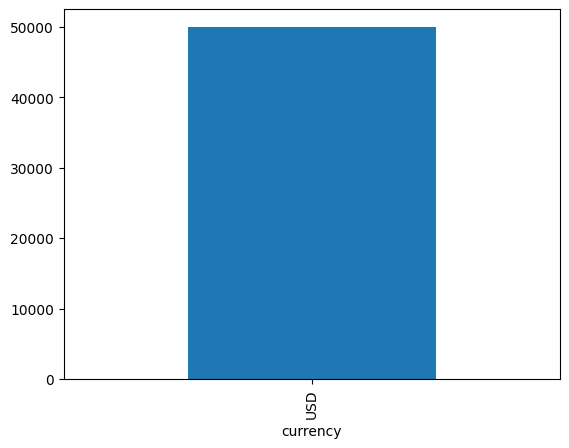

The average bathrooms for each category in fee is fee
No     1.445296
Yes    1.300995
Name: bathrooms, dtype: float64.


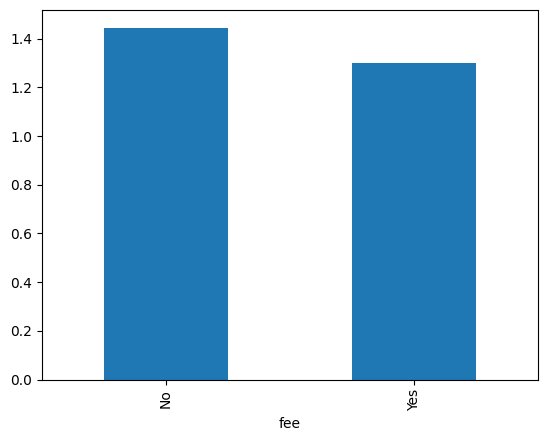

The min bathrooms for each category in fee is fee
No     1.0
Yes    1.0
Name: bathrooms, dtype: float64.


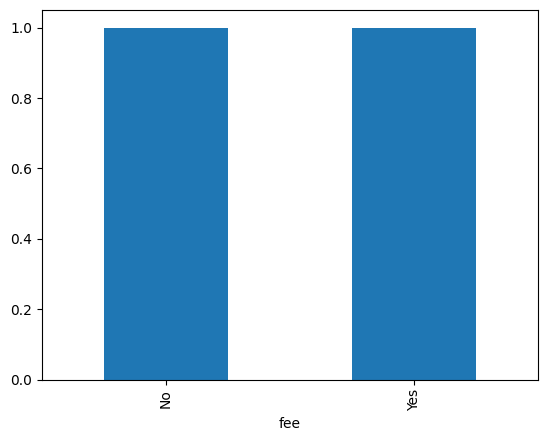

The max bathrooms for each category in fee is fee
No     9.0
Yes    3.5
Name: bathrooms, dtype: float64.


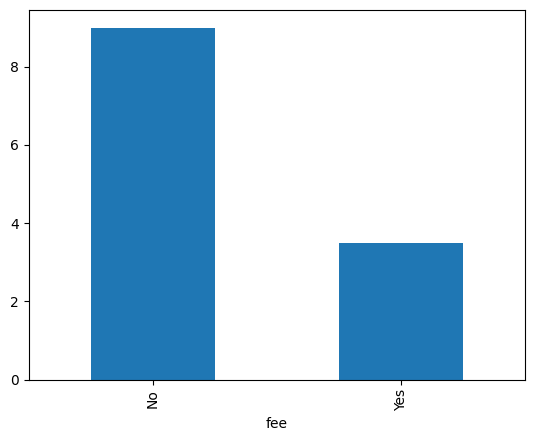

The average bedrooms for each category in fee is fee
No     1.728124
Yes    1.915423
Name: bedrooms, dtype: float64.


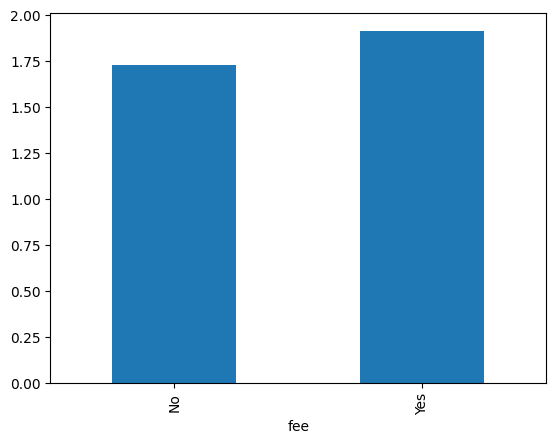

The min bedrooms for each category in fee is fee
No     0.0
Yes    0.0
Name: bedrooms, dtype: float64.


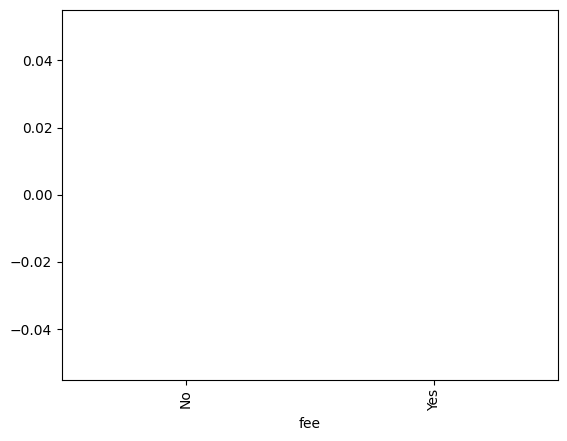

The max bedrooms for each category in fee is fee
No     9.0
Yes    5.0
Name: bedrooms, dtype: float64.


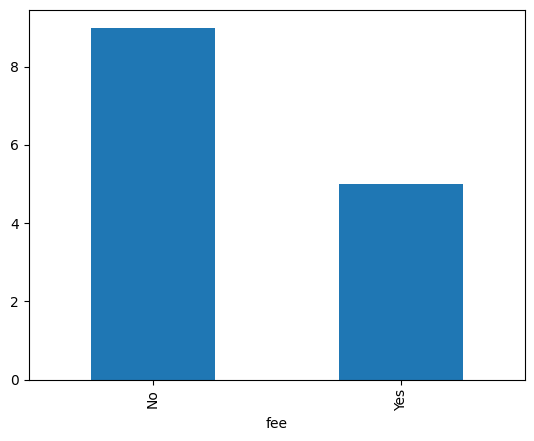

The average price for each category in fee is fee
No     1526.22064
Yes    1948.57209
Name: price, dtype: float64.


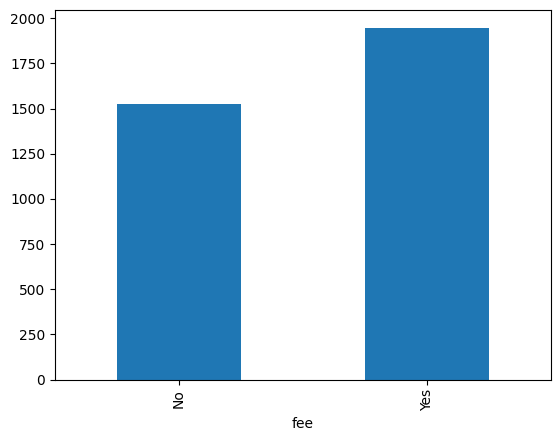

The min price for each category in fee is fee
No     200.0
Yes    100.0
Name: price, dtype: float64.


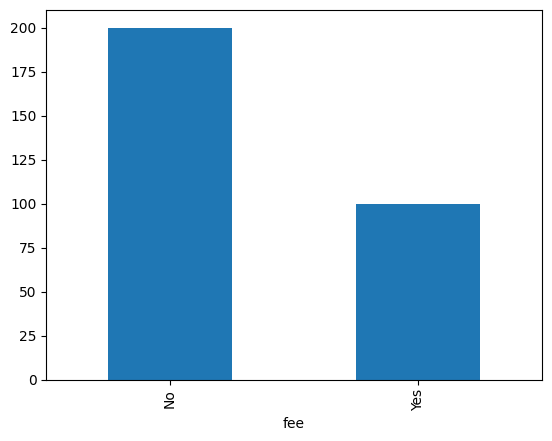

The max price for each category in fee is fee
No     52500.0
Yes     5400.0
Name: price, dtype: float64.


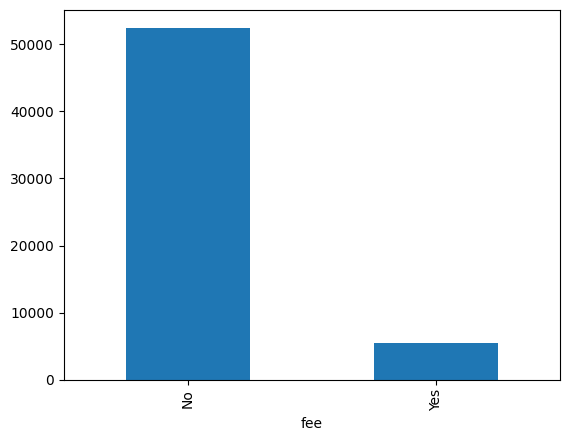

The average square_feet for each category in fee is fee
No     956.453668
Yes    950.706468
Name: square_feet, dtype: float64.


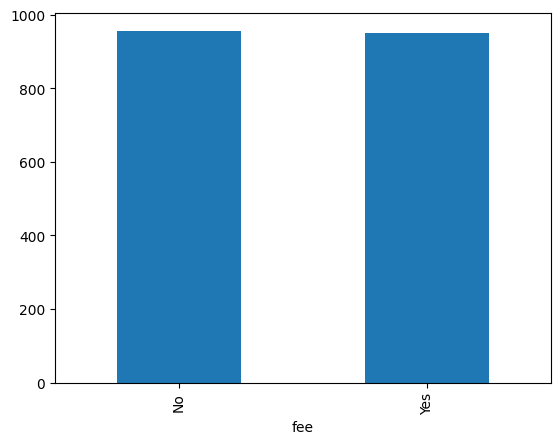

The min square_feet for each category in fee is fee
No     101
Yes    200
Name: square_feet, dtype: int64.


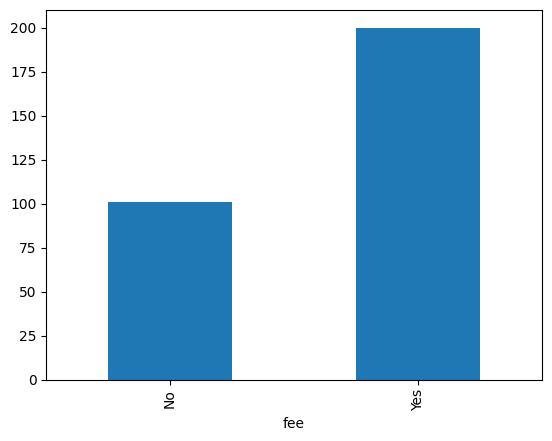

The max square_feet for each category in fee is fee
No     50000
Yes     3500
Name: square_feet, dtype: int64.


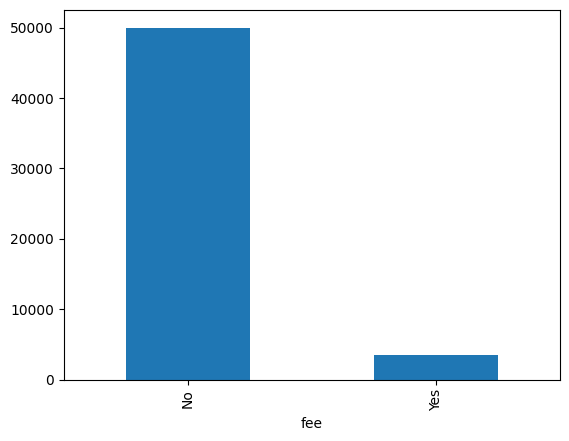

The average bathrooms for each category in has_photo is has_photo
No           1.446293
Thumbnail    1.437249
Yes          1.449551
Name: bathrooms, dtype: float64.


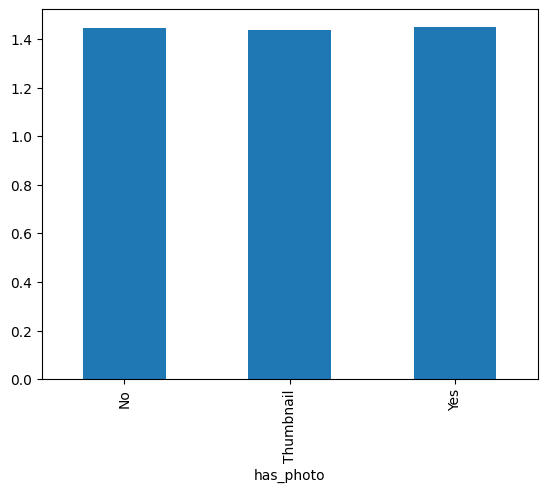

The min bathrooms for each category in has_photo is has_photo
No           1.0
Thumbnail    1.0
Yes          1.0
Name: bathrooms, dtype: float64.


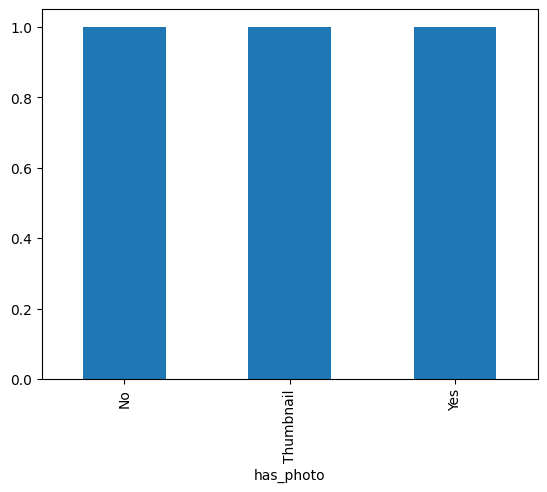

The max bathrooms for each category in has_photo is has_photo
No           7.5
Thumbnail    8.5
Yes          9.0
Name: bathrooms, dtype: float64.


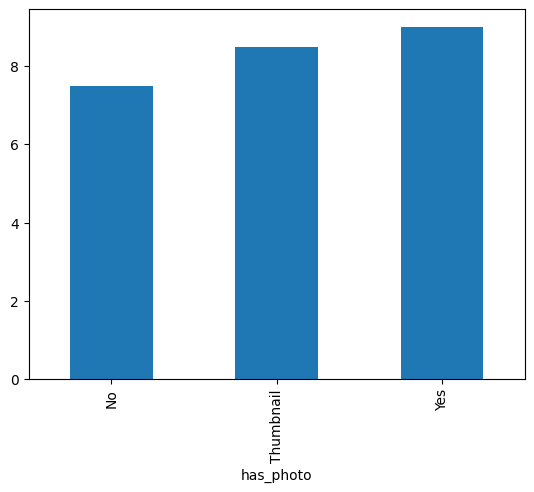

The average bedrooms for each category in has_photo is has_photo
No           1.736791
Thumbnail    1.721591
Yes          1.731380
Name: bedrooms, dtype: float64.


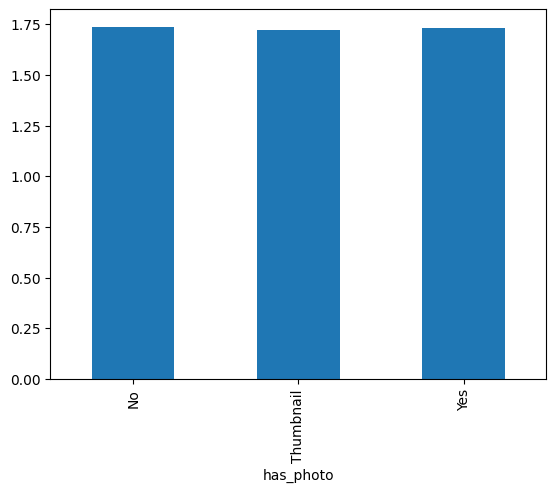

The min bedrooms for each category in has_photo is has_photo
No           0.0
Thumbnail    0.0
Yes          0.0
Name: bedrooms, dtype: float64.


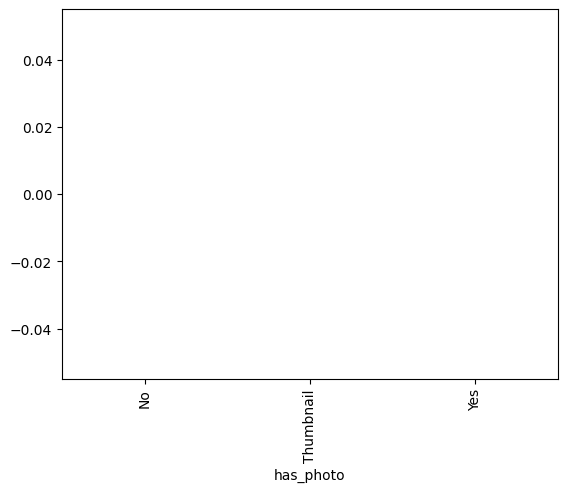

The max bedrooms for each category in has_photo is has_photo
No           7.0
Thumbnail    9.0
Yes          8.0
Name: bedrooms, dtype: float64.


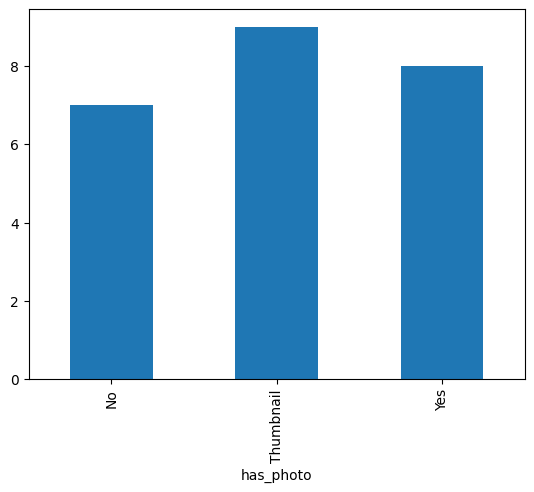

The average price for each category in has_photo is has_photo
No           1619.527615
Thumbnail    1462.104163
Yes          1551.726443
Name: price, dtype: float64.


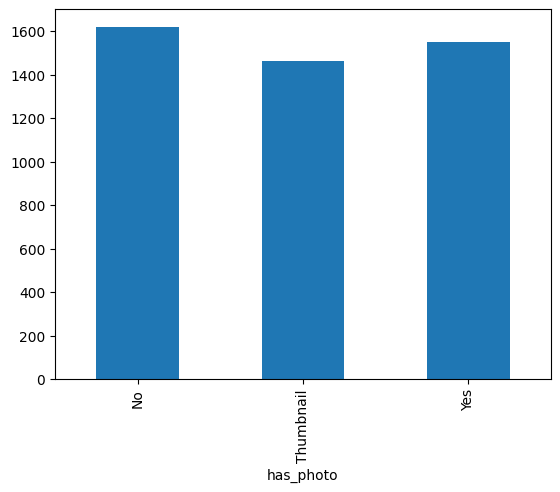

The min price for each category in has_photo is has_photo
No           300.0
Thumbnail    100.0
Yes          200.0
Name: price, dtype: float64.


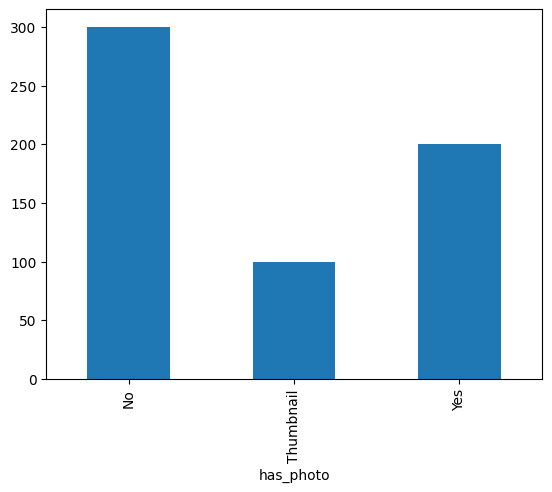

The max price for each category in has_photo is has_photo
No           35000.0
Thumbnail    52500.0
Yes          40000.0
Name: price, dtype: float64.


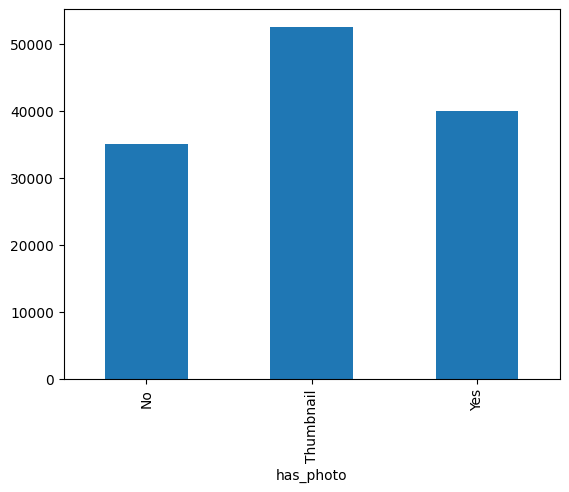

The average square_feet for each category in has_photo is has_photo
No           963.942270
Thumbnail    949.345403
Yes          959.562209
Name: square_feet, dtype: float64.


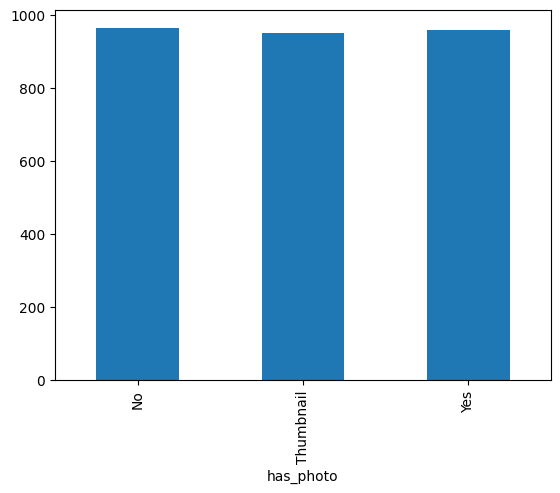

The min square_feet for each category in has_photo is has_photo
No           150
Thumbnail    101
Yes          144
Name: square_feet, dtype: int64.


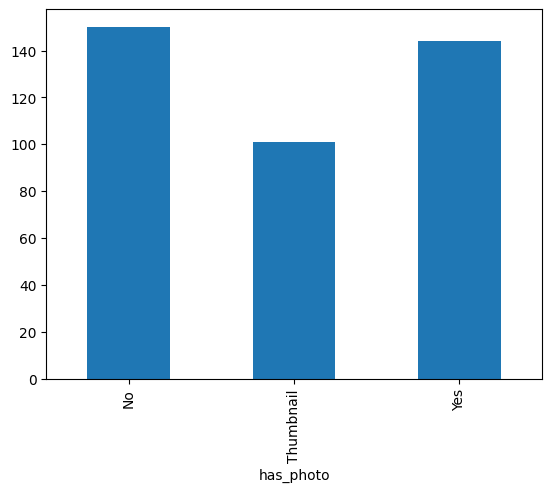

The max square_feet for each category in has_photo is has_photo
No            9998
Thumbnail    50000
Yes           9175
Name: square_feet, dtype: int64.


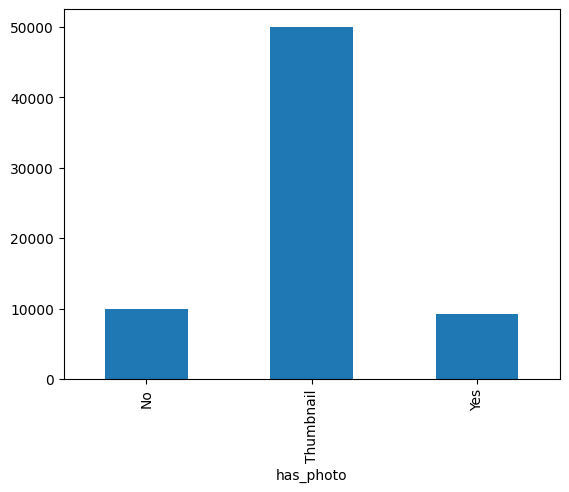

The average bathrooms for each category in pets_allowed is pets_allowed
Cats              1.239130
Cats,Dogs         1.448148
Cats,Dogs,None    1.000000
Dogs              2.019685
Name: bathrooms, dtype: float64.


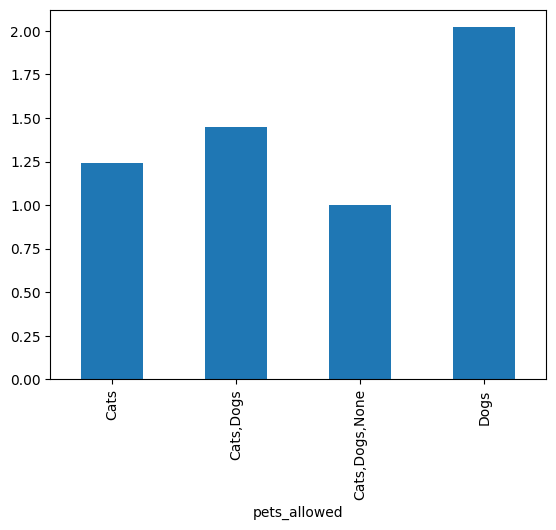

The min bathrooms for each category in pets_allowed is pets_allowed
Cats              1.0
Cats,Dogs         1.0
Cats,Dogs,None    1.0
Dogs              1.0
Name: bathrooms, dtype: float64.


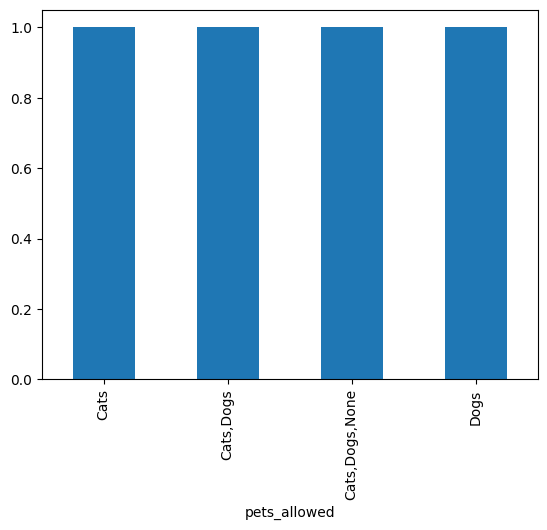

The max bathrooms for each category in pets_allowed is pets_allowed
Cats              4.0
Cats,Dogs         9.0
Cats,Dogs,None    1.0
Dogs              4.0
Name: bathrooms, dtype: float64.


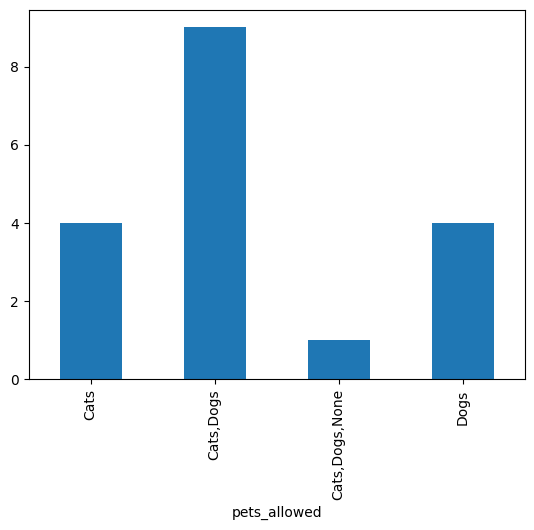

The average bedrooms for each category in pets_allowed is pets_allowed
Cats              1.579891
Cats,Dogs         1.730111
Cats,Dogs,None    1.000000
Dogs              2.653543
Name: bedrooms, dtype: float64.


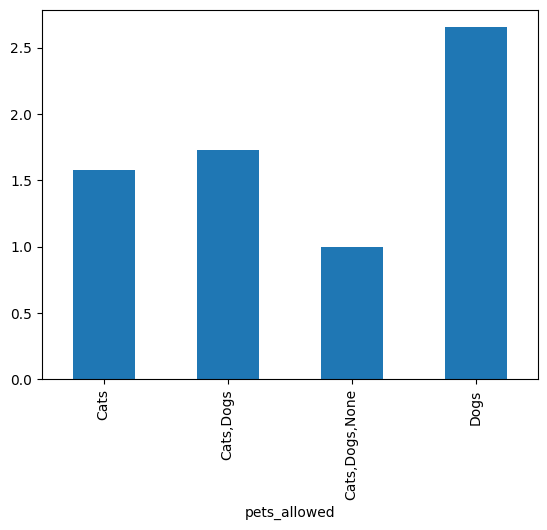

The min bedrooms for each category in pets_allowed is pets_allowed
Cats              0.0
Cats,Dogs         0.0
Cats,Dogs,None    1.0
Dogs              0.0
Name: bedrooms, dtype: float64.


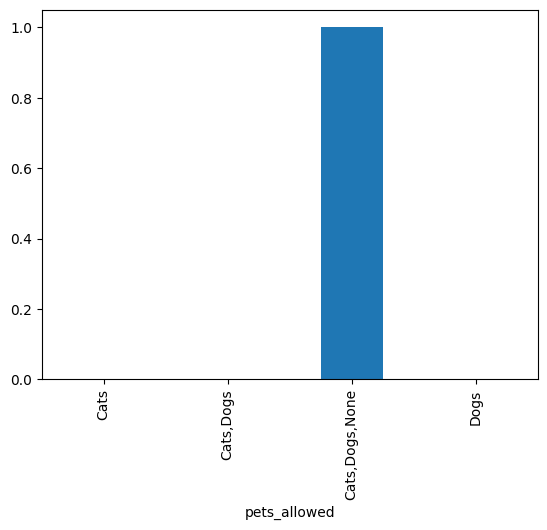

The max bedrooms for each category in pets_allowed is pets_allowed
Cats              7.0
Cats,Dogs         9.0
Cats,Dogs,None    1.0
Dogs              5.0
Name: bedrooms, dtype: float64.


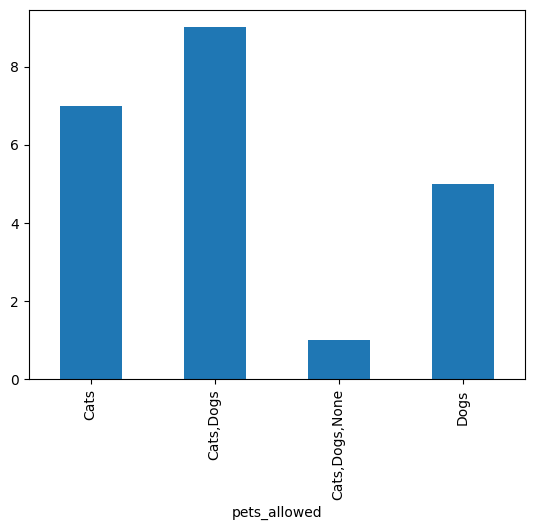

The average price for each category in pets_allowed is pets_allowed
Cats              1394.679348
Cats,Dogs         1528.902432
Cats,Dogs,None     930.000000
Dogs              2047.566929
Name: price, dtype: float64.


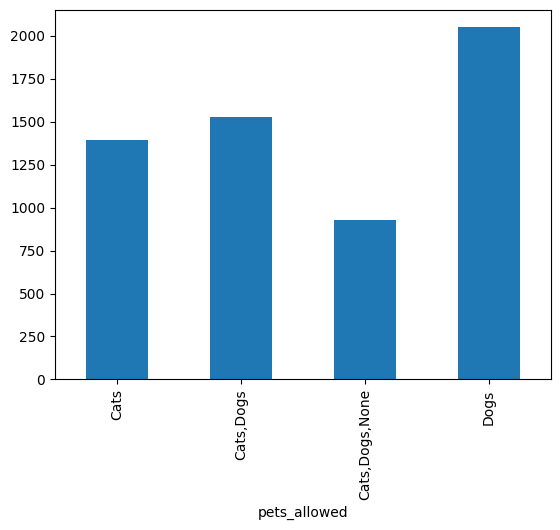

The min price for each category in pets_allowed is pets_allowed
Cats              325.0
Cats,Dogs         100.0
Cats,Dogs,None    930.0
Dogs              450.0
Name: price, dtype: float64.


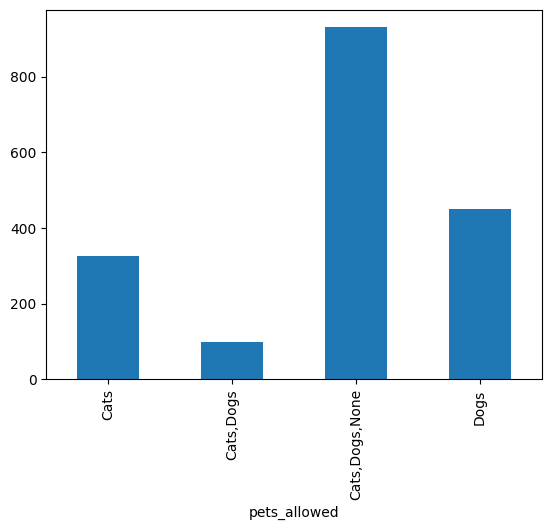

The max price for each category in pets_allowed is pets_allowed
Cats               8400.0
Cats,Dogs         52500.0
Cats,Dogs,None      930.0
Dogs               6900.0
Name: price, dtype: float64.


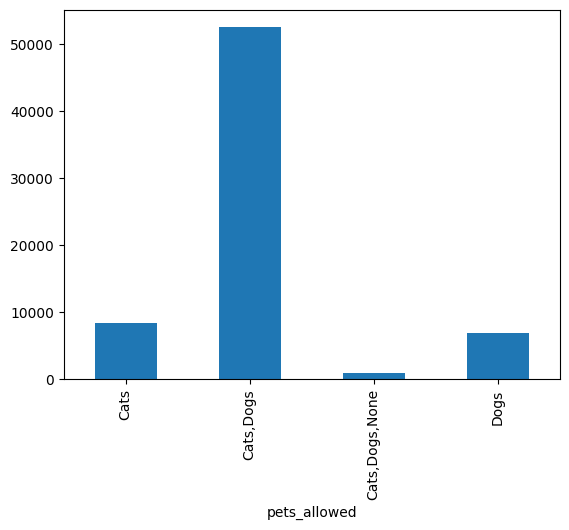

The average square_feet for each category in pets_allowed is pets_allowed
Cats               827.867391
Cats,Dogs          958.071880
Cats,Dogs,None     720.000000
Dogs              1570.637795
Name: square_feet, dtype: float64.


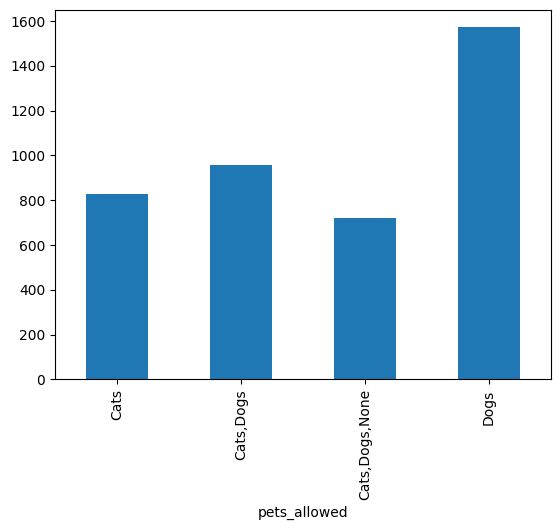

The min square_feet for each category in pets_allowed is pets_allowed
Cats              200
Cats,Dogs         101
Cats,Dogs,None    720
Dogs              325
Name: square_feet, dtype: int64.


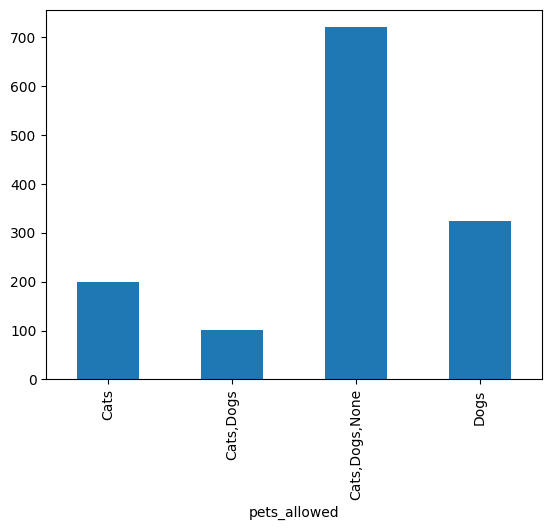

The max square_feet for each category in pets_allowed is pets_allowed
Cats               3058
Cats,Dogs         50000
Cats,Dogs,None      720
Dogs               4000
Name: square_feet, dtype: int64.


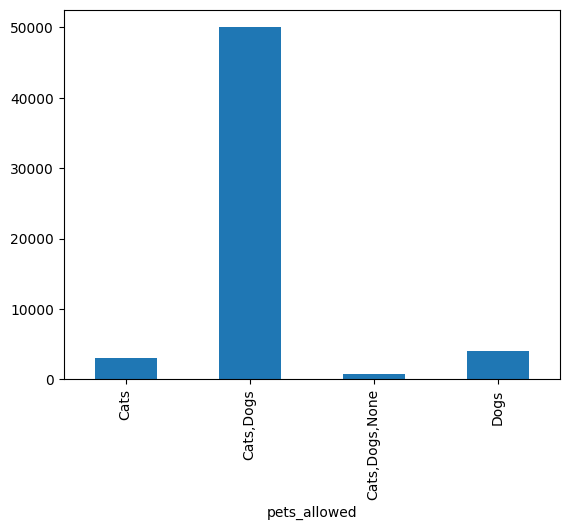

The average bathrooms for each category in price_type is price_type
Monthly           1.444977
Monthly|Weekly    1.000000
Weekly            2.500000
Name: bathrooms, dtype: float64.


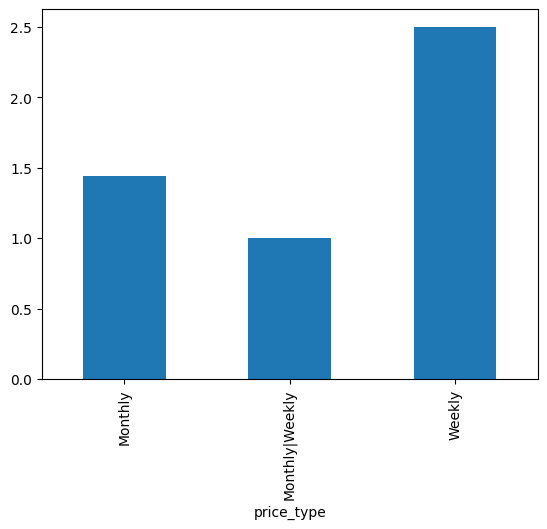

The min bathrooms for each category in price_type is price_type
Monthly           1.0
Monthly|Weekly    1.0
Weekly            1.0
Name: bathrooms, dtype: float64.


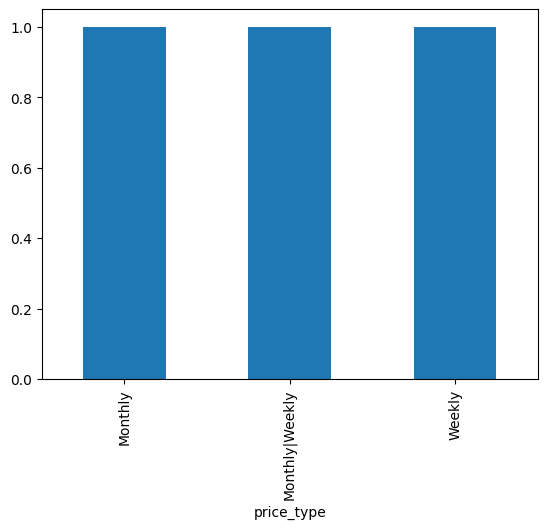

The max bathrooms for each category in price_type is price_type
Monthly           9.0
Monthly|Weekly    1.0
Weekly            4.0
Name: bathrooms, dtype: float64.


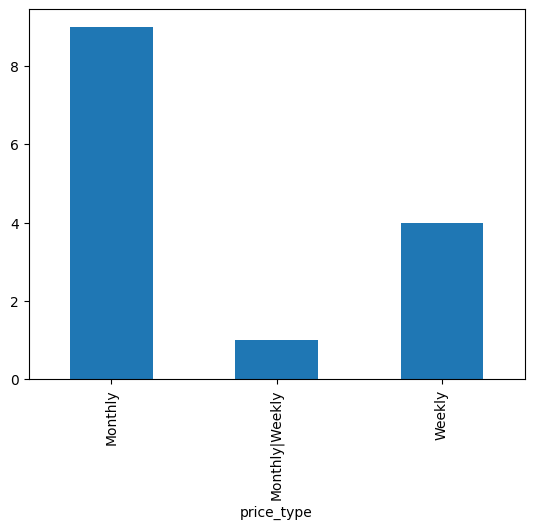

The average bedrooms for each category in price_type is price_type
Monthly           1.728482
Monthly|Weekly    2.000000
Weekly            2.333333
Name: bedrooms, dtype: float64.


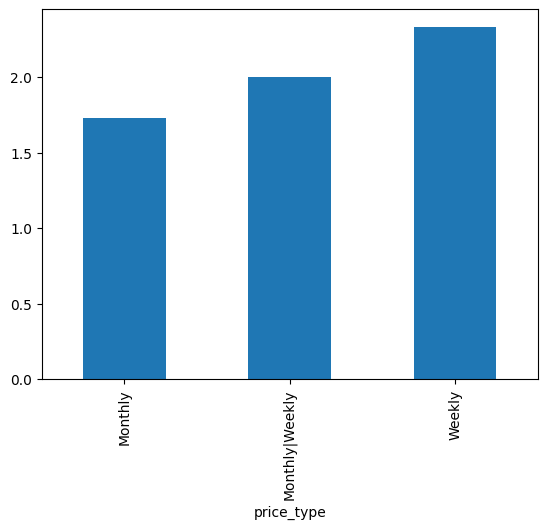

The min bedrooms for each category in price_type is price_type
Monthly           0.0
Monthly|Weekly    2.0
Weekly            1.0
Name: bedrooms, dtype: float64.


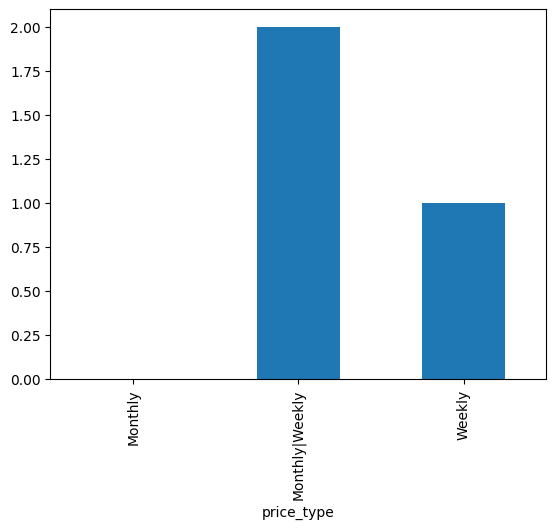

The max bedrooms for each category in price_type is price_type
Monthly           9.0
Monthly|Weekly    2.0
Weekly            4.0
Name: bedrooms, dtype: float64.


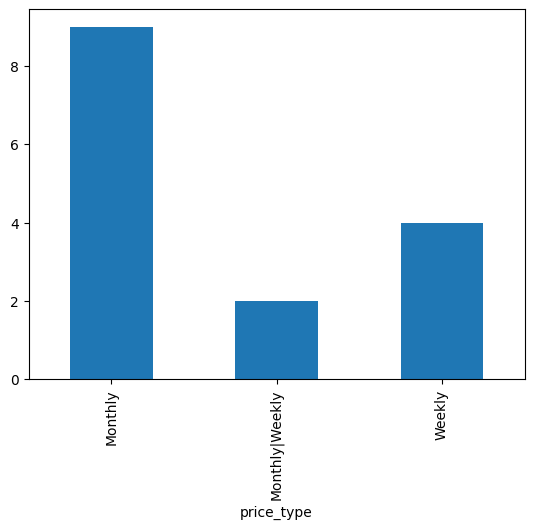

The average price for each category in price_type is price_type
Monthly           1527.023550
Monthly|Weekly     275.000000
Weekly            3636.666667
Name: price, dtype: float64.


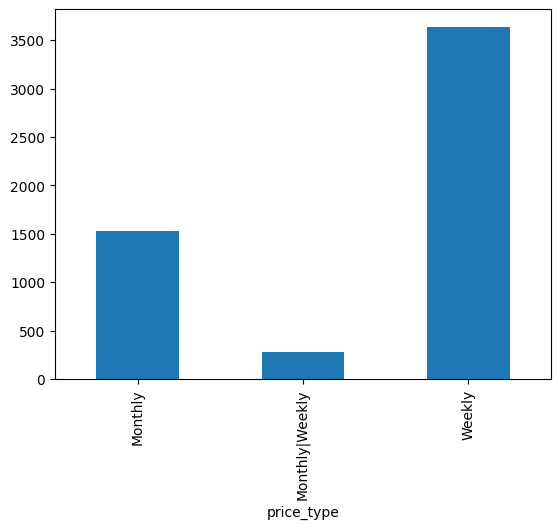

The min price for each category in price_type is price_type
Monthly           100.0
Monthly|Weekly    275.0
Weekly            850.0
Name: price, dtype: float64.


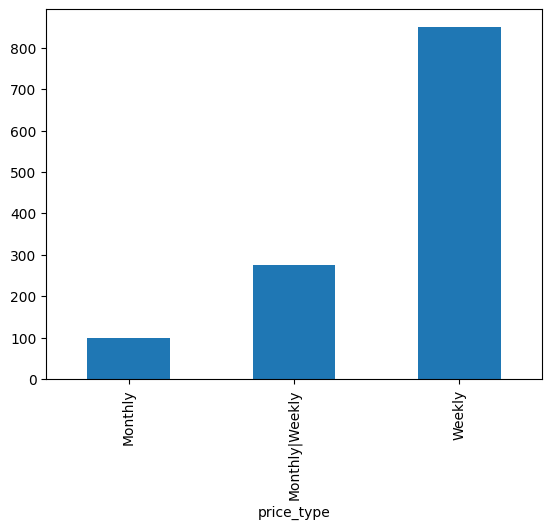

The max price for each category in price_type is price_type
Monthly           52500.0
Monthly|Weekly      275.0
Weekly             8500.0
Name: price, dtype: float64.


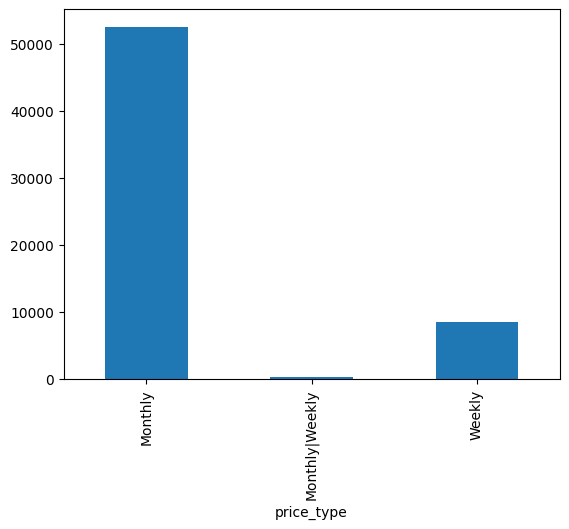

The average square_feet for each category in price_type is price_type
Monthly            956.415889
Monthly|Weekly     300.000000
Weekly            2042.000000
Name: square_feet, dtype: float64.


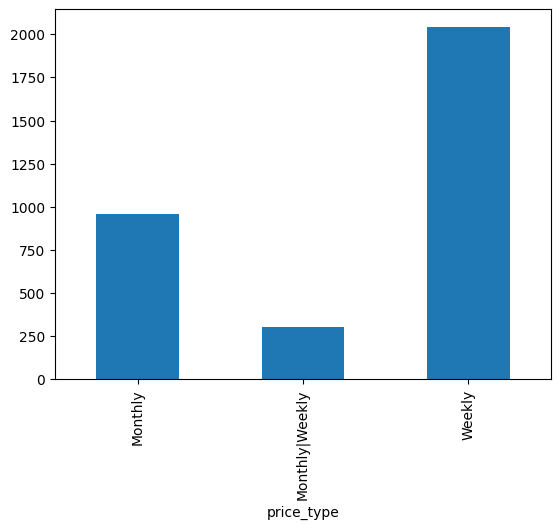

The min square_feet for each category in price_type is price_type
Monthly           101
Monthly|Weekly    300
Weekly            200
Name: square_feet, dtype: int64.


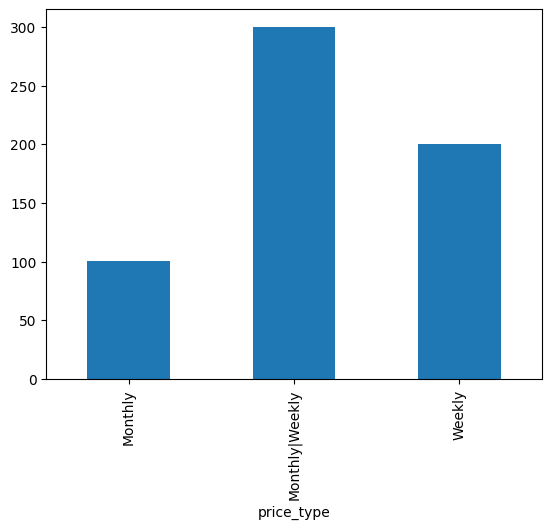

The max square_feet for each category in price_type is price_type
Monthly           50000
Monthly|Weekly      300
Weekly             3600
Name: square_feet, dtype: int64.


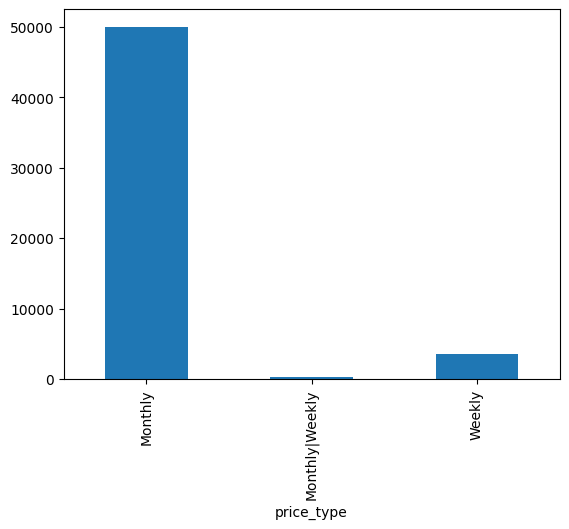

The average bathrooms for each category in state is state
AK    1.232759
AL    1.546610
AR    1.556856
AZ    1.486111
CA    1.454665
CO    1.395843
CT    1.211198
DC    1.193548
DE    1.428571
FL    1.589815
GA    1.558105
HI    1.806452
IA    1.329301
ID    1.598958
IL    1.243243
IN    1.386051
KS    1.407119
KY    1.453266
LA    1.463569
MA    1.354469
MD    1.389879
ME    1.078125
MI    1.342254
MN    1.283993
MO    1.334580
MS    1.584112
MT    1.356322
NC    1.566741
ND    1.487887
NE    1.348039
NH    1.251020
NJ    1.368024
NM    1.083333
NV    1.542304
NY    1.287557
OH    1.437947
OK    1.574411
OR    1.326715
PA    1.304367
RI    1.352941
SC    1.608480
SD    1.290698
TN    1.513914
TX    1.405211
UT    1.461063
VA    1.465028
VT    1.132000
WA    1.456647
WI    1.238372
WV    1.538462
WY    1.562500
Name: bathrooms, dtype: float64.


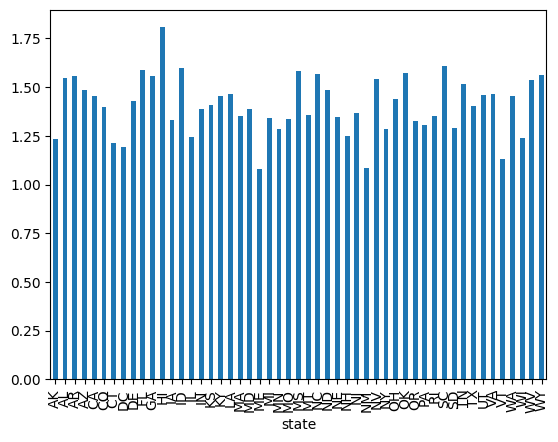

The min bathrooms for each category in state is state
AK    1.0
AL    1.0
AR    1.0
AZ    1.0
CA    1.0
CO    1.0
CT    1.0
DC    1.0
DE    1.0
FL    1.0
GA    1.0
HI    1.0
IA    1.0
ID    1.0
IL    1.0
IN    1.0
KS    1.0
KY    1.0
LA    1.0
MA    1.0
MD    1.0
ME    1.0
MI    1.0
MN    1.0
MO    1.0
MS    1.0
MT    1.0
NC    1.0
ND    1.0
NE    1.0
NH    1.0
NJ    1.0
NM    1.0
NV    1.0
NY    1.0
OH    1.0
OK    1.0
OR    1.0
PA    1.0
RI    1.0
SC    1.0
SD    1.0
TN    1.0
TX    1.0
UT    1.0
VA    1.0
VT    1.0
WA    1.0
WI    1.0
WV    1.0
WY    1.0
Name: bathrooms, dtype: float64.


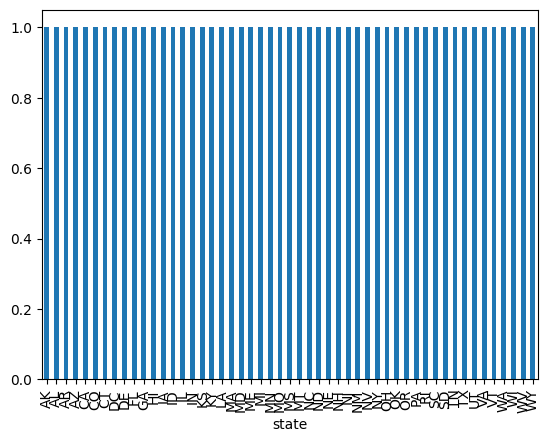

The max bathrooms for each category in state is state
AK    3.5
AL    4.0
AR    4.5
AZ    5.0
CA    9.0
CO    5.5
CT    2.5
DC    4.5
DE    3.0
FL    5.0
GA    5.0
HI    4.0
IA    4.0
ID    2.5
IL    4.0
IN    7.0
KS    5.0
KY    3.0
LA    4.0
MA    4.5
MD    8.5
ME    2.0
MI    5.0
MN    5.0
MO    4.5
MS    3.5
MT    2.5
NC    4.5
ND    6.0
NE    3.0
NH    3.5
NJ    6.0
NM    2.0
NV    6.0
NY    6.0
OH    4.5
OK    4.0
OR    4.0
PA    4.0
RI    7.0
SC    5.0
SD    3.0
TN    4.5
TX    4.5
UT    4.0
VA    5.5
VT    2.5
WA    4.0
WI    4.0
WV    3.5
WY    2.0
Name: bathrooms, dtype: float64.


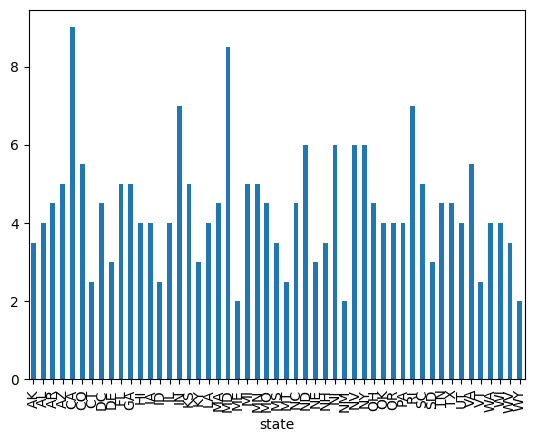

The average bedrooms for each category in state is state
AK    1.689655
AL    1.918079
AR    1.819398
AZ    1.737374
CA    1.665469
CO    1.613951
CT    1.730845
DC    1.225806
DE    1.857143
FL    1.831976
GA    1.816842
HI    2.322581
IA    1.852151
ID    2.000000
IL    1.789575
IN    1.872299
KS    1.751947
KY    1.741709
LA    1.743494
MA    1.848099
MD    1.714936
ME    1.562500
MI    1.891549
MN    1.641997
MO    1.706567
MS    2.000000
MT    2.011494
NC    1.813602
ND    2.004038
NE    1.601961
NH    1.821769
NJ    1.586184
NM    1.458333
NV    1.745823
NY    1.654021
OH    1.774648
OK    1.804069
OR    1.675090
PA    1.672014
RI    1.823529
SC    1.862335
SD    1.709302
TN    1.771993
TX    1.590461
UT    1.893696
VA    1.744745
VT    1.720000
WA    1.797688
WI    1.860465
WV    2.230769
WY    2.000000
Name: bedrooms, dtype: float64.


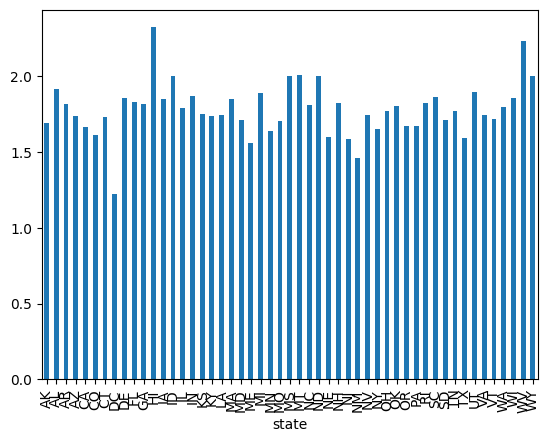

The min bedrooms for each category in state is state
AK    0.0
AL    0.0
AR    0.0
AZ    0.0
CA    0.0
CO    0.0
CT    0.0
DC    0.0
DE    1.0
FL    0.0
GA    0.0
HI    0.0
IA    0.0
ID    1.0
IL    0.0
IN    0.0
KS    0.0
KY    0.0
LA    0.0
MA    0.0
MD    0.0
ME    0.0
MI    0.0
MN    0.0
MO    0.0
MS    1.0
MT    1.0
NC    0.0
ND    0.0
NE    0.0
NH    0.0
NJ    0.0
NM    1.0
NV    0.0
NY    0.0
OH    0.0
OK    0.0
OR    0.0
PA    0.0
RI    0.0
SC    1.0
SD    0.0
TN    0.0
TX    0.0
UT    0.0
VA    0.0
VT    0.0
WA    0.0
WI    0.0
WV    1.0
WY    1.0
Name: bedrooms, dtype: float64.


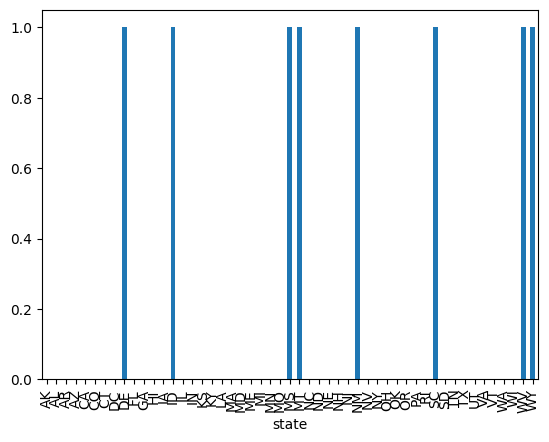

The max bedrooms for each category in state is state
AK    5.0
AL    5.0
AR    5.0
AZ    6.0
CA    8.0
CO    6.0
CT    5.0
DC    5.0
DE    4.0
FL    6.0
GA    6.0
HI    5.0
IA    4.0
ID    4.0
IL    8.0
IN    7.0
KS    6.0
KY    5.0
LA    4.0
MA    6.0
MD    6.0
ME    4.0
MI    9.0
MN    5.0
MO    5.0
MS    4.0
MT    4.0
NC    6.0
ND    5.0
NE    4.0
NH    5.0
NJ    6.0
NM    3.0
NV    5.0
NY    6.0
OH    6.0
OK    5.0
OR    5.0
PA    6.0
RI    7.0
SC    6.0
SD    5.0
TN    5.0
TX    5.0
UT    6.0
VA    5.0
VT    4.0
WA    6.0
WI    8.0
WV    5.0
WY    3.0
Name: bedrooms, dtype: float64.


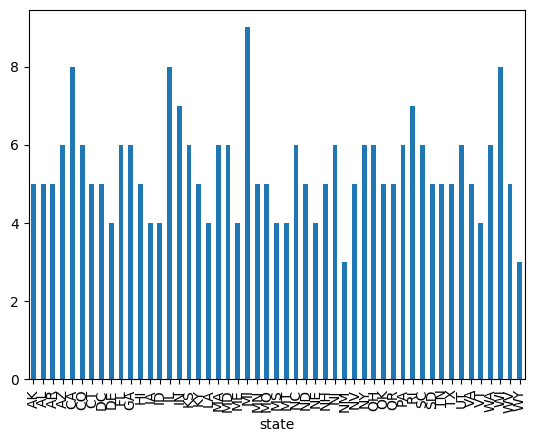

The average price for each category in state is state
AK    1050.758621
AL     959.802260
AR     874.367893
AZ    1118.585017
CA    2463.682652
CO    1554.475872
CT    1266.229862
DC    2112.139785
DE    1154.857143
FL    1573.941625
GA    1350.718526
HI    2729.193548
IA     949.526882
ID    1122.322917
IL    1483.243243
IN    1011.907662
KS     922.753059
KY     989.283407
LA    1026.063941
MA    2192.226757
MD    1645.772934
ME    1247.656250
MI    1196.795775
MN    1391.936317
MO    1048.430590
MS     874.158879
MT    1118.344828
NC    1153.213253
ND     945.471063
NE     933.163725
NH    1453.174150
NJ    2037.855536
NM     844.041667
NV    1173.335229
NY    2555.564492
OH    1109.999184
OK    1015.319058
OR    1475.357401
PA    1301.324421
RI    2034.731092
SC    1143.715859
SD     887.651163
TN    1177.209156
TX    1239.047611
UT    1300.651422
VA    1485.602803
VT    1415.080000
WA    1825.742967
WI    1230.700000
WV     871.769231
WY     791.750000
Name: price, dtype: float64.

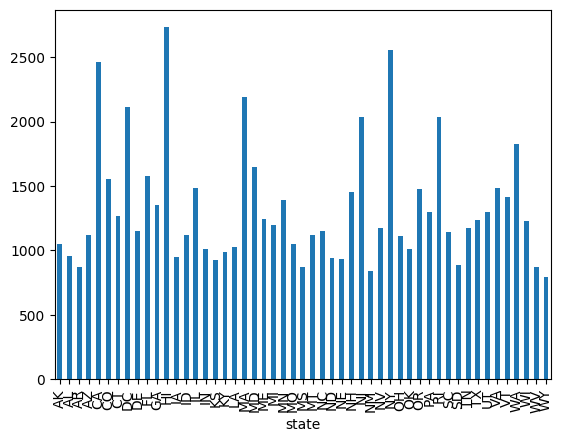

The min price for each category in state is state
AK    685.0
AL    285.0
AR    200.0
AZ    350.0
CA    493.0
CO    313.0
CT    100.0
DC    790.0
DE    755.0
FL    275.0
GA    350.0
HI    956.0
IA    395.0
ID    400.0
IL    390.0
IN    224.0
KS    325.0
KY    350.0
LA    375.0
MA    600.0
MD    200.0
ME    700.0
MI    300.0
MN    450.0
MO    400.0
MS    420.0
MT    675.0
NC    264.0
ND    345.0
NE    400.0
NH    600.0
NJ    675.0
NM    550.0
NV    470.0
NY    600.0
OH    299.0
OK    450.0
OR    500.0
PA    415.0
RI    725.0
SC    382.0
SD    322.0
TN    375.0
TX    300.0
UT    350.0
VA    340.0
VT    400.0
WA    550.0
WI    386.0
WV    495.0
WY    479.0
Name: price, dtype: float64.


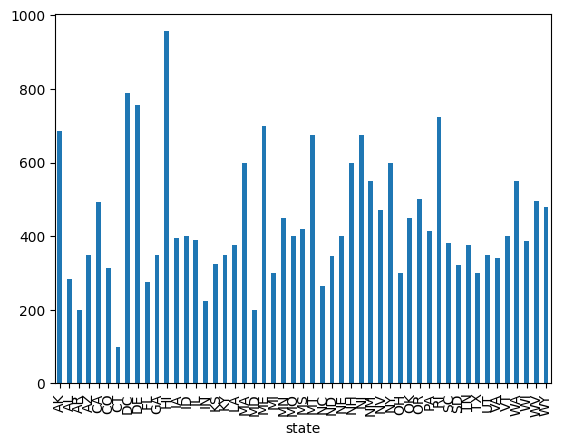

The max price for each category in state is state
AK     2032.0
AL     7000.0
AR     2900.0
AZ     8500.0
CA    52500.0
CO    30000.0
CT     3350.0
DC     4995.0
DE     2099.0
FL    25000.0
GA     4200.0
HI     9500.0
IA     2745.0
ID     2240.0
IL    15000.0
IN     9000.0
KS     4500.0
KY     3400.0
LA     3600.0
MA     9000.0
MD    11000.0
ME     2400.0
MI     5700.0
MN     6000.0
MO     3675.0
MS     2500.0
MT     3500.0
NC     4795.0
ND     2700.0
NE     2195.0
NH    12500.0
NJ     5325.0
NM     1850.0
NV     9500.0
NY    15362.0
OH     5000.0
OK     3295.0
OR     3995.0
PA     4850.0
RI     7700.0
SC     2975.0
SD     1900.0
TN    10379.0
TX     4999.0
UT     3795.0
VA     7500.0
VT     3500.0
WA     9395.0
WI     8345.0
WV     2000.0
WY     1445.0
Name: price, dtype: float64.


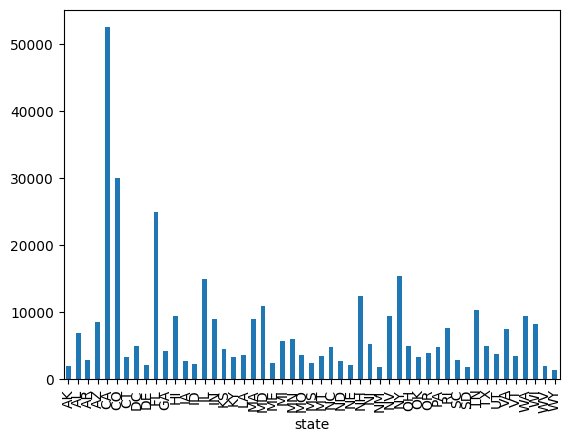

The average square_feet for each category in state is state
AK     793.120690
AL    1037.025424
AR     971.740803
AZ     911.933081
CA     925.578973
CO     894.008600
CT     906.734774
DC     677.419355
DE    1035.714286
FL    1043.208384
GA    1076.393053
HI    1067.677419
IA     909.161290
ID    1010.833333
IL     899.890927
IN     941.705305
KS     942.747497
KY     947.317588
LA     966.147212
MA    1010.766076
MD     955.018575
ME     766.656250
MI     962.919718
MN     885.223752
MO     920.163757
MS    1034.439252
MT    1000.425287
NC    1008.435404
ND    1010.676985
NE     909.096078
NH     911.989116
NJ     941.023852
NM     706.833333
NV     951.259865
NY    1008.767830
OH     969.270667
OK     972.540685
OR     924.274368
PA     913.287879
RI     902.386555
SC    1032.669604
SD     955.093023
TN    1017.395871
TX     908.920447
UT     986.440049
VA     944.959531
VT     978.816000
WA     917.948362
WI     932.776744
WV    1238.307692
WY     965.125000
Name: square_feet, dty

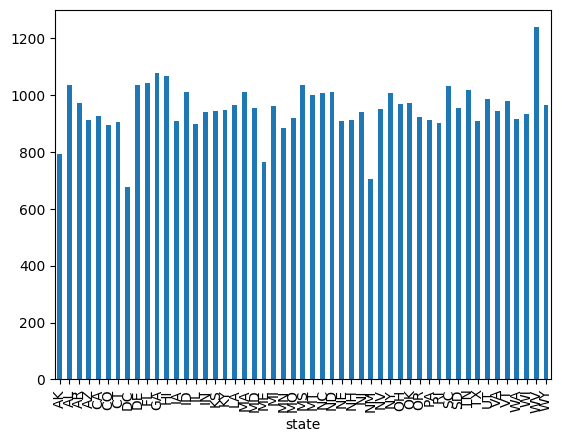

The min square_feet for each category in state is state
AK    245
AL    219
AR    300
AZ    156
CA    116
CO    219
CT    300
DC    101
DE    250
FL    200
GA    200
HI    338
IA    250
ID    200
IL    225
IN    106
KS    300
KY    250
LA    350
MA    200
MD    219
ME    305
MI    250
MN    250
MO    300
MS    300
MT    353
NC    200
ND    245
NE    329
NH    175
NJ    200
NM    219
NV    150
NY    130
OH    275
OK    350
OR    180
PA    250
RI    300
SC    250
SD    300
TN    230
TX    200
UT    300
VA    107
VT    350
WA    116
WI    200
WV    600
WY    650
Name: square_feet, dtype: int64.


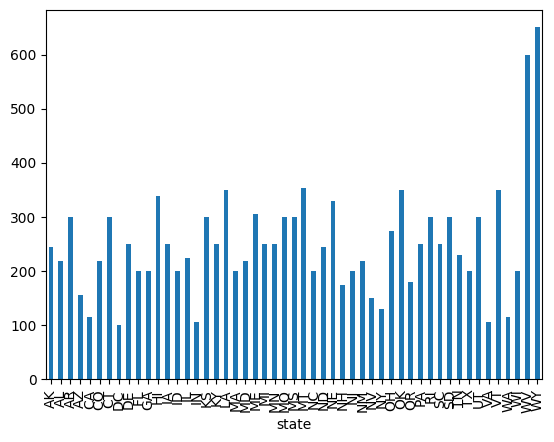

The max square_feet for each category in state is state
AK     2500
AL     3344
AR     4408
AZ     5051
CA    11000
CO     5872
CT     2300
DC     2280
DE     1800
FL     5700
GA     5489
HI     2613
IA     3700
ID     2337
IL     6000
IN     4959
KS     4741
KY     2800
LA     3000
MA     5640
MD    11318
ME     1400
MI     4315
MN     6300
MO     4431
MS     1750
MT     3000
NC     6000
ND     3475
NE     2100
NH     3560
NJ     4911
NM     1273
NV     4812
NY    40000
OH    12000
OK     3234
OR     3622
PA     3296
RI     3784
SC     4000
SD     2288
TN     4480
TX    50000
UT     5921
VA     7104
VT     2730
WA     3820
WI     4900
WV     3280
WY     1330
Name: square_feet, dtype: int64.


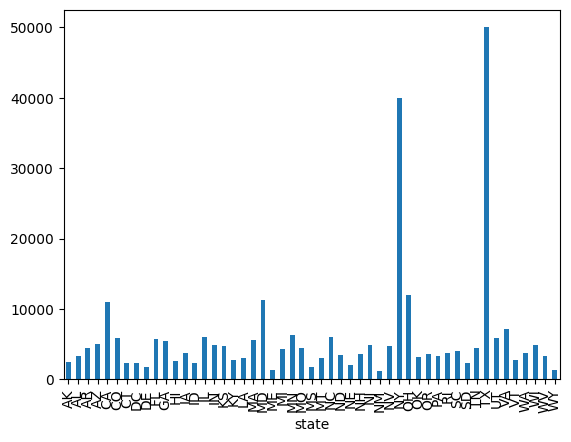

The average bathrooms for each category in source is source
AgentWebsite         2.500000
Apartable            1.000000
BostonApartments     1.382979
Claz                 1.312500
FreeAdsTime          1.000000
GoSection8           1.259725
Home Rentals         1.312500
HousesForRent        1.000000
Listanza             1.344828
ListedBuy            1.427320
Nest Seekers         2.900000
RENTCaf              1.317073
RENTOCULAR           1.444444
Real Estate Agent    1.000000
Real Estate Shows    1.000000
RealRentals          1.335821
RentDigs.com         1.453109
RentFeeder           1.458333
RentLingo            1.362940
Seattle Rentals      1.000000
SpreadMyAd           1.204545
Z57                  2.000000
rentbits             1.200000
tenantcloud          1.197581
vFlyer               1.400000
Name: bathrooms, dtype: float64.


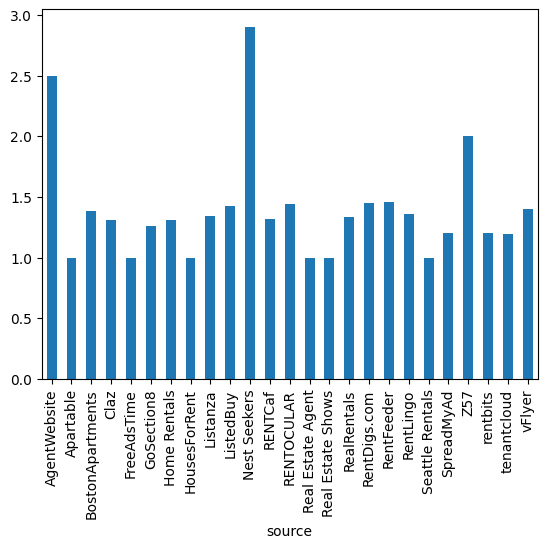

The min bathrooms for each category in source is source
AgentWebsite         2.5
Apartable            1.0
BostonApartments     1.0
Claz                 1.0
FreeAdsTime          1.0
GoSection8           1.0
Home Rentals         1.0
HousesForRent        1.0
Listanza             1.0
ListedBuy            1.0
Nest Seekers         1.0
RENTCaf              1.0
RENTOCULAR           1.0
Real Estate Agent    1.0
Real Estate Shows    1.0
RealRentals          1.0
RentDigs.com         1.0
RentFeeder           1.0
RentLingo            1.0
Seattle Rentals      1.0
SpreadMyAd           1.0
Z57                  2.0
rentbits             1.0
tenantcloud          1.0
vFlyer               1.0
Name: bathrooms, dtype: float64.


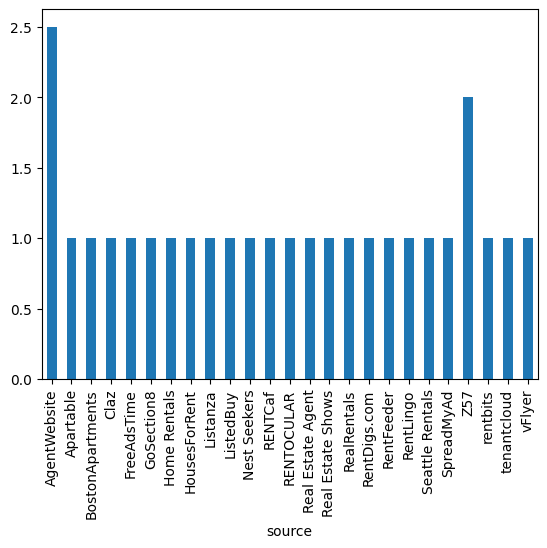

The max bathrooms for each category in source is source
AgentWebsite         2.5
Apartable            1.0
BostonApartments     3.5
Claz                 2.0
FreeAdsTime          1.0
GoSection8           3.0
Home Rentals         2.0
HousesForRent        1.0
Listanza             2.0
ListedBuy            3.5
Nest Seekers         4.5
RENTCaf              2.0
RENTOCULAR           2.0
Real Estate Agent    1.0
Real Estate Shows    1.0
RealRentals          3.0
RentDigs.com         9.0
RentFeeder           2.5
RentLingo            8.5
Seattle Rentals      1.0
SpreadMyAd           2.5
Z57                  2.0
rentbits             2.0
tenantcloud          3.0
vFlyer               2.0
Name: bathrooms, dtype: float64.


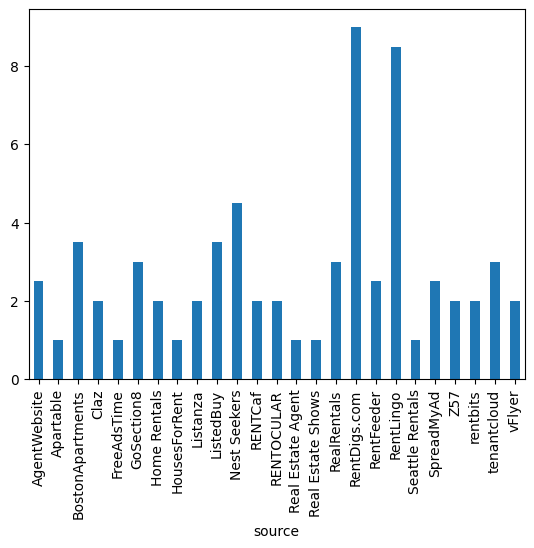

The average bedrooms for each category in source is source
AgentWebsite         3.000000
Apartable            2.000000
BostonApartments     2.191489
Claz                 1.875000
FreeAdsTime          0.000000
GoSection8           1.958810
Home Rentals         1.750000
HousesForRent        1.000000
Listanza             2.103448
ListedBuy            1.956217
Nest Seekers         2.800000
RENTCaf              1.317073
RENTOCULAR           1.888889
Real Estate Agent    2.000000
Real Estate Shows    2.000000
RealRentals          1.466418
RentDigs.com         1.723268
RentFeeder           2.166667
RentLingo            1.767620
Seattle Rentals      0.500000
SpreadMyAd           1.500000
Z57                  2.000000
rentbits             1.400000
tenantcloud          1.725806
vFlyer               2.000000
Name: bedrooms, dtype: float64.


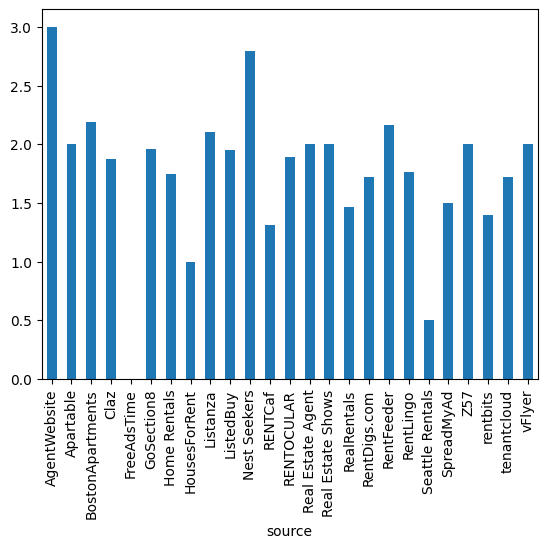

The min bedrooms for each category in source is source
AgentWebsite         3.0
Apartable            2.0
BostonApartments     0.0
Claz                 1.0
FreeAdsTime          0.0
GoSection8           0.0
Home Rentals         1.0
HousesForRent        1.0
Listanza             0.0
ListedBuy            0.0
Nest Seekers         1.0
RENTCaf              0.0
RENTOCULAR           1.0
Real Estate Agent    2.0
Real Estate Shows    2.0
RealRentals          0.0
RentDigs.com         0.0
RentFeeder           0.0
RentLingo            0.0
Seattle Rentals      0.0
SpreadMyAd           0.0
Z57                  2.0
rentbits             1.0
tenantcloud          0.0
vFlyer               1.0
Name: bedrooms, dtype: float64.


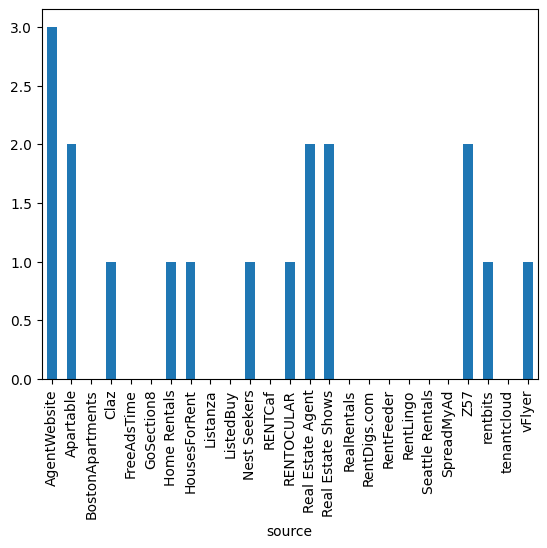

The max bedrooms for each category in source is source
AgentWebsite         3.0
Apartable            2.0
BostonApartments     5.0
Claz                 3.0
FreeAdsTime          0.0
GoSection8           5.0
Home Rentals         3.0
HousesForRent        1.0
Listanza             5.0
ListedBuy            5.0
Nest Seekers         4.0
RENTCaf              3.0
RENTOCULAR           4.0
Real Estate Agent    2.0
Real Estate Shows    2.0
RealRentals          5.0
RentDigs.com         8.0
RentFeeder           5.0
RentLingo            9.0
Seattle Rentals      1.0
SpreadMyAd           3.0
Z57                  2.0
rentbits             2.0
tenantcloud          4.0
vFlyer               3.0
Name: bedrooms, dtype: float64.


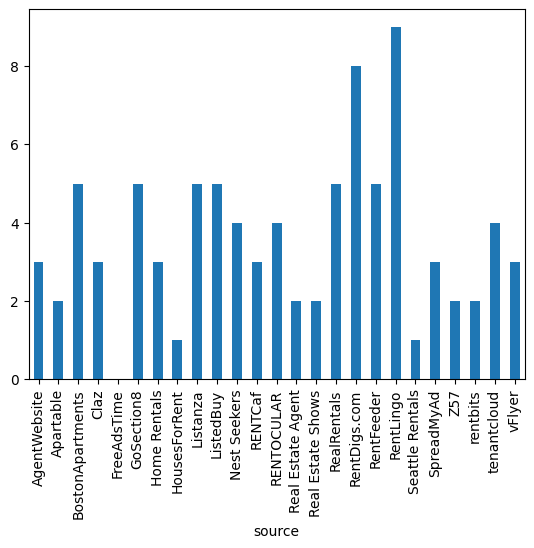

The average price for each category in source is source
AgentWebsite         1350.000000
Apartable             869.000000
BostonApartments     2969.755319
Claz                 1127.000000
FreeAdsTime           950.000000
GoSection8           1041.457666
Home Rentals         1081.250000
HousesForRent        2500.000000
Listanza             2189.620690
ListedBuy            1147.427320
Nest Seekers         8153.200000
RENTCaf              1891.585366
RENTOCULAR           2163.944444
Real Estate Agent     800.000000
Real Estate Shows    1100.000000
RealRentals          2190.455224
RentDigs.com         1532.967818
RentFeeder           1499.166667
RentLingo            1466.169266
Seattle Rentals      1697.500000
SpreadMyAd           1213.090909
Z57                  1150.000000
rentbits              931.000000
tenantcloud          1058.354758
vFlyer               1532.000000
Name: price, dtype: float64.


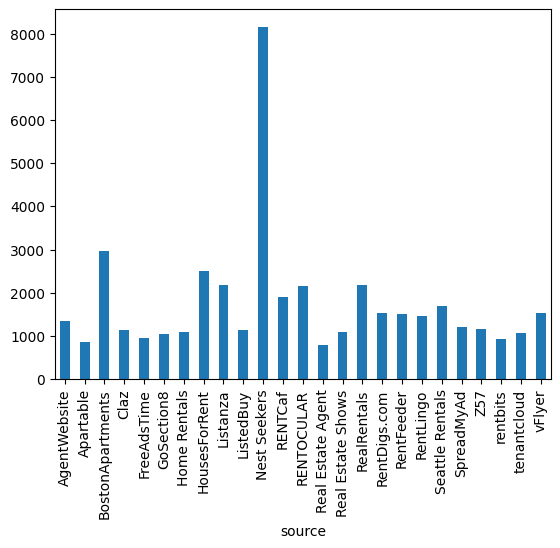

The min price for each category in source is source
AgentWebsite         1350.0
Apartable             869.0
BostonApartments     1475.0
Claz                  695.0
FreeAdsTime           950.0
GoSection8            350.0
Home Rentals          490.0
HousesForRent        2500.0
Listanza              750.0
ListedBuy             275.0
Nest Seekers         2950.0
RENTCaf               500.0
RENTOCULAR           1100.0
Real Estate Agent     800.0
Real Estate Shows    1100.0
RealRentals           495.0
RentDigs.com          200.0
RentFeeder            875.0
RentLingo             200.0
Seattle Rentals      1395.0
SpreadMyAd            300.0
Z57                  1150.0
rentbits              725.0
tenantcloud           100.0
vFlyer                715.0
Name: price, dtype: float64.


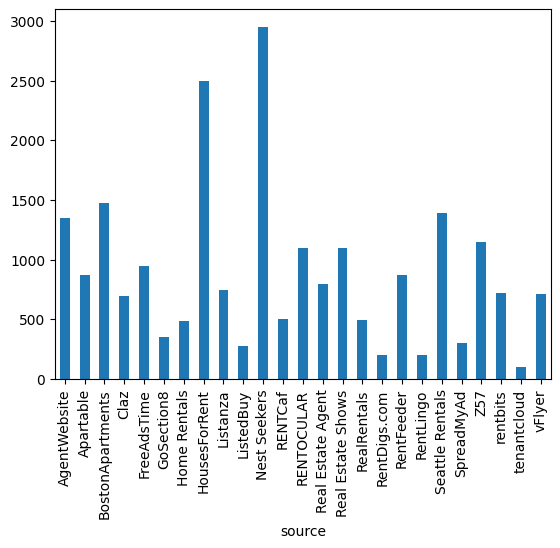

The max price for each category in source is source
AgentWebsite          1350.0
Apartable              869.0
BostonApartments      5400.0
Claz                  1795.0
FreeAdsTime            950.0
GoSection8            3600.0
Home Rentals          2195.0
HousesForRent         2500.0
Listanza              4790.0
ListedBuy            11000.0
Nest Seekers         13900.0
RENTCaf               3167.0
RENTOCULAR            5000.0
Real Estate Agent      800.0
Real Estate Shows     1100.0
RealRentals          15362.0
RentDigs.com         52500.0
RentFeeder            3400.0
RentLingo            25000.0
Seattle Rentals       2000.0
SpreadMyAd            2500.0
Z57                   1150.0
rentbits              1095.0
tenantcloud           3000.0
vFlyer                2050.0
Name: price, dtype: float64.


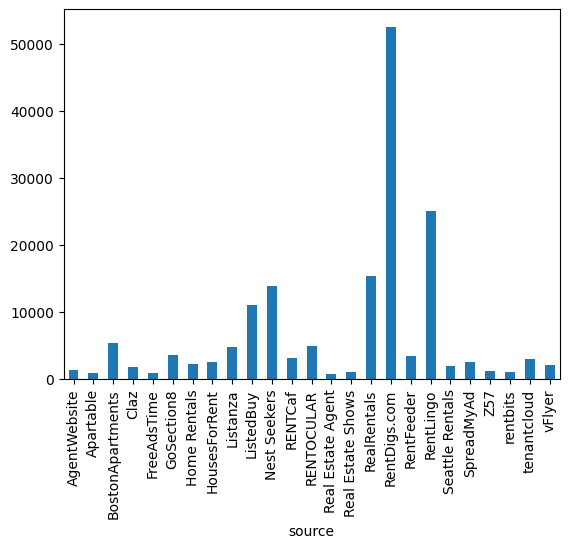

The average square_feet for each category in source is source
AgentWebsite         1794.000000
Apartable            1155.000000
BostonApartments     1094.904255
Claz                  839.000000
FreeAdsTime           560.000000
GoSection8            923.787185
Home Rentals          912.375000
HousesForRent        1000.000000
Listanza             4160.344828
ListedBuy            1032.294221
Nest Seekers         2441.600000
RENTCaf               850.195122
RENTOCULAR           1149.222222
Real Estate Agent     866.000000
Real Estate Shows    1300.000000
RealRentals           949.839552
RentDigs.com          955.979907
RentFeeder           1285.500000
RentLingo             944.785240
Seattle Rentals       484.500000
SpreadMyAd            871.090909
Z57                  1300.000000
rentbits              779.000000
tenantcloud           820.362903
vFlyer                875.000000
Name: square_feet, dtype: float64.


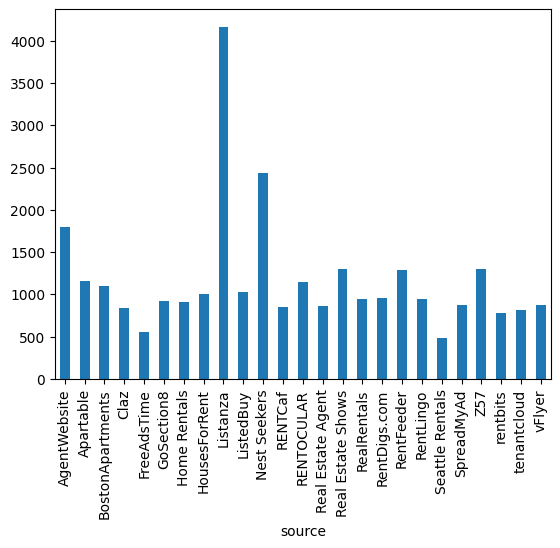

The min square_feet for each category in source is source
AgentWebsite         1794
Apartable            1155
BostonApartments      212
Claz                  491
FreeAdsTime           560
GoSection8            116
Home Rentals          500
HousesForRent        1000
Listanza              130
ListedBuy             200
Nest Seekers          652
RENTCaf               464
RENTOCULAR            500
Real Estate Agent     866
Real Estate Shows    1300
RealRentals           200
RentDigs.com          144
RentFeeder            575
RentLingo             101
Seattle Rentals       350
SpreadMyAd            300
Z57                  1300
rentbits              600
tenantcloud           200
vFlyer                535
Name: square_feet, dtype: int64.


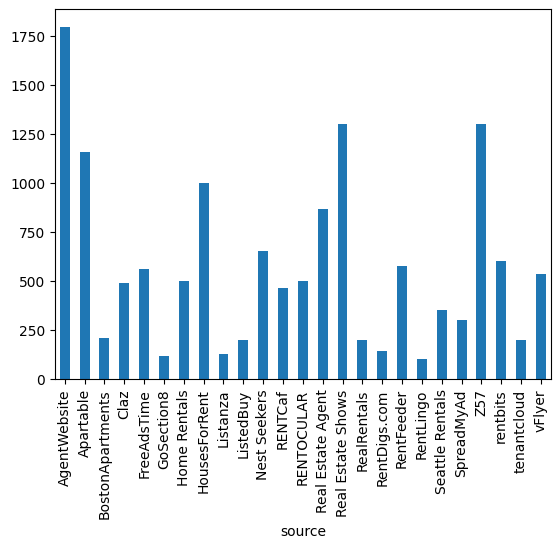

The max square_feet for each category in source is source
AgentWebsite          1794
Apartable             1155
BostonApartments      3500
Claz                  1040
FreeAdsTime            560
GoSection8            2300
Home Rentals          1200
HousesForRent         1000
Listanza             50000
ListedBuy            12000
Nest Seekers          4256
RENTCaf               1500
RENTOCULAR            3000
Real Estate Agent      866
Real Estate Shows     1300
RealRentals           3900
RentDigs.com         11000
RentFeeder            2100
RentLingo            11318
Seattle Rentals        619
SpreadMyAd            2326
Z57                   1300
rentbits              1080
tenantcloud           2000
vFlyer                1100
Name: square_feet, dtype: int64.


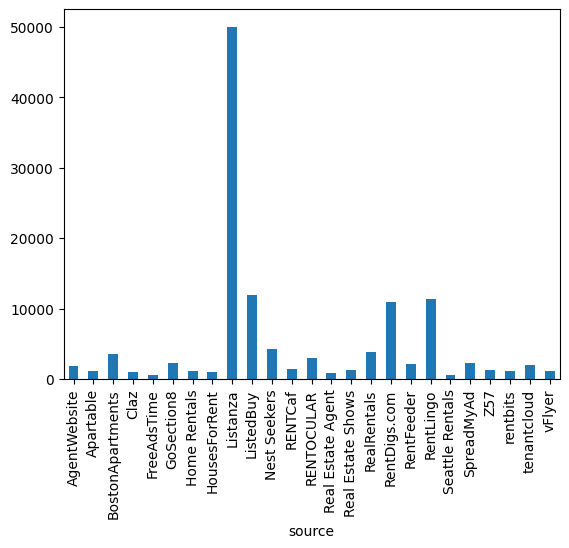

In [42]:
#Bivariate Analysis

for i in Categorical:
    for j in Numerical:
        print(f'The average {j} for each category in {i} is {df.groupby(i)[j].mean()}.')
        df.groupby(i)[j].mean().plot(kind='bar')
        plt.show()
        print(f'The min {j} for each category in {i} is {df.groupby(i)[j].min()}.')
        df.groupby(i)[j].min().plot(kind='bar')
        plt.show()
        print(f'The max {j} for each category in {i} is {df.groupby(i)[j].max()}.')
        df.groupby(i)[j].max().plot(kind='bar')
        plt.show()

In [45]:
#Encoding

df_dummies = pd.get_dummies(df,drop_first = True)

In [46]:
df_dummies.shape

(99408, 94)

In [47]:
#Split the dataset before applying the standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

from sklearn.model_selection import train_test_split

x = df_dummies.drop('price',axis = 1)
y = df_dummies['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 100)

In [48]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
#Call the model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [50]:
#Train the model
lr.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
#Prediction
y_pred1 = lr.predict(x_test_scaled)

In [52]:
#Performance Matrix for Regression Model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [53]:
mae = mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
r2 = r2_score(y_test,y_pred1)

print(f'The Mean Absolute Error of Model is {mae}')
print(f'The Mean Squared Error of Model is {mse}')
print(f'The R2 Score of Model is {r2}')

The Mean Absolute Error of Model is 368.9574948625822
The Mean Squared Error of Model is 577477.3361150844
The R2 Score of Model is 0.3106783340170095


In [54]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors = 15)

In [55]:
KNN.fit(x_train_scaled, y_train)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
y_pred = KNN.predict(x_test_scaled)

In [57]:
r2 = r2_score(y_test,y_pred)

In [58]:
print("KNN",r2)

KNN 0.4970152850567372


In [59]:
#Decision Tree 
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor()


In [60]:
Tree.fit(x_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [61]:
y_pred = Tree.predict(x_test_scaled)

In [62]:
r2 = r2_score(y_test,y_pred)

In [63]:
print("Decision Tree",r2)

Decision Tree 0.4830989251187543


In [64]:
#LASSO 
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)

In [65]:
lasso.fit(x_train_scaled, y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [66]:
y_pred = lasso.predict(x_test_scaled)

In [67]:
r2 = r2_score(y_test,y_pred)

In [68]:
print("Lasso", r2)

Lasso 0.31321437626946547


In [69]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1)

In [70]:
ridge.fit(x_train_scaled,y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [71]:
y_pred = ridge.predict(x_test_scaled)

In [72]:
r2 = r2_score(y_test,y_pred)

In [73]:
print("Ridge:", r2)

Ridge: 0.3106788912084244


In [74]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha = 1)


In [75]:
elasticnet.fit(x_train_scaled, y_train)

,alpha,1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [76]:
y_pred = elasticnet.predict(x_test_scaled)

In [77]:
r2 = r2_score(y_test,y_pred)

In [78]:
print("Elastic_Net:", r2)

Elastic_Net: 0.33799917024020043


In [89]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 200, random_state = 42)

In [90]:
RFR.fit(x_train_scaled, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [91]:
y_pred = RFR.predict(x_test_scaled)

In [92]:
r2 = r2_score(y_test, y_pred)

In [93]:
print("Random Forest Regressor: ", r2)

Random Forest Regressor:  0.6328865844702639


In [94]:
#Using cross Validation
#Import all the required Libraries
import pandas as pd #data manipulation and analysis.
import numpy as np #numerical computing.
import matplotlib.pyplot as plt #Used for Visualization
import seaborn as sns #Used for Visualization
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [95]:
df.head(10)

,category,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,state,latitude,longitude,source
0,housing/rent/apartment,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,Monthly,542,CA,33.8520,-118.3759,RentLingo
1,housing/rent/apartment,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,Monthly,1500,VA,37.0867,-76.4941,RentLingo
2,housing/rent/apartment,2.0,3.0,USD,No,Thumbnail,"Cats,Dogs",1395.0,Monthly,1650,NC,35.8230,-78.6438,RentLingo
3,housing/rent/apartment,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,Monthly,820,CA,38.3622,-121.9712,RentLingo
4,housing/rent/apartment,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,Monthly,624,NM,35.1038,-106.6110,RentLingo
5,housing/rent/apartment,1.5,2.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,Monthly,965,NM,35.1038,-106.6110,RentLingo
6,housing/rent/apartment,2.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,Monthly,1120,VA,37.0451,-76.3664,RentLingo
7,housing/rent/apartment,2.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1300.0,Monthly,947,CO,39.6894,-105.1119,RentLingo
8,housing/rent/apartment,1.0,2.0,USD,No,Thumbnail,Dogs,795.0,Monthly,600,WV,38.3454,-81.6219,RentLingo
9,housing/rent/apartment,2.0,2.0,USD,No,Thumbnail,"Cats,Dogs",2150.0,Monthly,1005,CA,34.2551,-118.5976,RentLingo


In [96]:
# Define the model
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 15)
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor(n_estimators = 100, random_state = 2025)
model5 = Ridge(alpha = 1)
model6 = Lasso(alpha = 1)
model7 = ElasticNet(alpha = 1)

In [97]:
# 3. Set up the cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [98]:
# Perform cross-validation using Negative MSE
# Scikit-learn's scoring API assumes higher values are better, so error metrics are negated.
scores1 = cross_val_score(model1, x, y, cv=kfold, scoring='r2')

In [99]:
r2_scores = scores1
print(f"MSE for each fold: {r2_scores}")
print(f"Average MSE: {r2_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {r2_scores.std():.4f}")

MSE for each fold: [0.43243857 0.46666429 0.49554013 0.45979355 0.39247013 0.47379077
 0.34073324 0.43533143 0.41924079 0.25792167]
Average MSE: 0.4174
Standard Deviation of MSE: 0.0678


In [100]:
#KNeighborsRegressor(n_neighbors = 15)
scores2 = cross_val_score(model2, x, y, cv=kfold, scoring='r2')
r2_scores = scores2
print(f"MSE for each fold: {r2_scores}")
print(f"Average MSE: {r2_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {r2_scores.std():.4f}")

MSE for each fold: [0.47459123 0.52067041 0.50659775 0.53907518 0.48806977 0.54010449
 0.33827945 0.4931196  0.43138945 0.46215332]
Average MSE: 0.4794
Standard Deviation of MSE: 0.0570


In [101]:
#DecisionTreeRegressor()
scores3 = cross_val_score(model3, x, y, cv=kfold, scoring='r2')
r2_scores = scores3
print(f"MSE for each fold: {r2_scores}")
print(f"Average MSE: {r2_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {r2_scores.std():.4f}")

MSE for each fold: [0.61296784 0.52606927 0.63119766 0.57977712 0.72060454 0.63021509
 0.49760492 0.70171793 0.61431674 0.56555466]
Average MSE: 0.6080
Standard Deviation of MSE: 0.0664


In [111]:
#RandomForestRegressor
scores4 = cross_val_score(model4, x, y, cv=kfold, scoring='r2')
r2_scores = scores4
print(f"MSE for each fold: {r2_scores}")
print(f"Average MSE: {r2_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {r2_scores.std():.4f}")

MSE for each fold: [0.76770511 0.80061851 0.82015448 0.75155223 0.82828886 0.79566821
 0.5369963  0.81257265 0.77791357 0.78740081]
Average MSE: 0.7679
Standard Deviation of MSE: 0.0802


In [110]:
#Ridge
scores5 = cross_val_score(model5, x, y, cv=kfold, scoring='r2')
r2_scores = scores5
print(f"MSE for each fold: {r2_scores}")
print(f"Average MSE: {r2_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {r2_scores.std():.4f}")

MSE for each fold: [0.43305413 0.46586572 0.49584997 0.45964773 0.39237044 0.47429363
 0.34028015 0.44314438 0.41911671 0.25781212]
Average MSE: 0.4181
Standard Deviation of MSE: 0.0682


In [109]:
#Lasso
scores6 = cross_val_score(model6, x, y, cv=kfold, scoring='r2')
r2_scores = scores6
print(f"MSE for each fold: {r2_scores}")
print(f"Average MSE: {r2_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {r2_scores.std():.4f}")

MSE for each fold: [0.42512727 0.45319881 0.48697351 0.45016641 0.37346583 0.46797124
 0.33068023 0.43931147 0.41056424 0.24108476]
Average MSE: 0.4079
Standard Deviation of MSE: 0.0707


In [105]:
#ElasticNet
scores7 = cross_val_score(model7, x, y, cv=kfold, scoring='r2')
r2_scores = scores7
print(f"MSE for each fold: {r2_scores}")
print(f"Average MSE: {r2_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {r2_scores.std():.4f}")

MSE for each fold: [ 0.25009728  0.24962433  0.25510844  0.26397579  0.11349355  0.24887285
  0.17523003  0.25065563  0.23185111 -0.02227223]
Average MSE: 0.2017
Standard Deviation of MSE: 0.0869
